# LendingClub: (1) Dataset Cleansing
- Sonny Song (xs2512@columbia.edu); Zi Wang (zw2933@columbia.edu); Hyunwoo Woo (hw2980@columbia.edu)
- 2025-01-27

- Borrowers' issue dates: Jan. 2007 - Dec. 2018

#### Other sources to check:
- https://www.lendingclub.com/resource-center/personal-loan/what-to-do-if-you-are-declined-a-personal-loan
- https://www.lendingclub.com/help/personal-loan-faq/what-should-i-do-if-im-declined
- https://en.wikipedia.org/wiki/LendingClub

In [2]:
# Packages (modules)
import pandas as pd; import numpy as np; import re; import pickle
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format # pd.set_option('display.max_row', 30); # pd.set_option('display.max_columns', 30)

### <font color=red>Write your file path</font>
- <font color=red>where LendingClub data is saved: "LC_accepted_2007_2018.csv"  and "LC_rejected_2007_2018.csv"</font>

In [1]:
import os
path = os.getcwd(); os.chdir("D:/Research/P2P_Lending/data_origin") # Write your file path

print(path)

C:\Users\hwwoo\Jupyter_Projects\P2P


# <font color=green>0. Load</font>

In [3]:
# Basic load and Set
df_ac = pd.read_csv('LC_accepted_2007_2018.csv', low_memory = False) # raw data import
df_ac

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.00000,44.82000,1.00000
2260698,88215728,NaN,14000.00000,14000.00000,14000.00000,60 months,14.49000,329.33000,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'policy_code' check

In [5]:
print(df_ac.shape[1]) # number of columns
print(df_ac.iloc[2260700].isnull().sum()) # rows with a non-numerical value in the "id" column: all np.NaN values
print( len(df_ac[df_ac.drop(columns=['id']).isnull().all(axis=1)]) ) # total number of the case

151
150
33


In [6]:
df_ac[df_ac.drop(columns=['id']).isnull().all(axis=1)].head(5) # all column values are NaN (Except the 'id' column)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528961,Total amount funded in policy code 1: 1741781700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528962,Total amount funded in policy code 2: 564202131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651664,Total amount funded in policy code 1: 1791201400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_ac['policy_code'].value_counts(dropna = False)
# df_ac[['year_issue', 'policy_code']].value_counts(dropna=False).sort_index(ascending=True) # Since 2014: policy_code = 2 exists

policy_code
1.00000    2260668
NaN             33
Name: count, dtype: int64

In [76]:
df_ac = df_ac[df_ac['id'].apply(lambda x: x.replace('.', '', 1).isdigit())] # Remove rows that have policy codes 1 or 2 in "id" (not normal ids)
# Our main research does not use borrowers related to particular policies (policy code 1 or 2)
    # Policy Code 1 loans: for borrowers with FICO scores of 660 or higher, while Policy Code 2 loans: for borrowers with lower scores.
    # policy_code=2: does not meet the LendingClub's current policy & available to select institutional investors
    # https://www.fintechnexus.com/policy-code-2-loans-lending-club/

df_ac = df_ac.dropna(axis=1, how='all') # Remove 'member_id' column: all values are null
df_ac = df_ac.reset_index(drop = True)

print("# Sample = ", len(df_ac)); print("# Unique borrower id = ", df_ac['id'].nunique(dropna = False), "\n")
print(df_ac.info(), "\n"); print("=================="); print(df_ac['issue_d'].value_counts())
df_ac

# Sample =  2260668
# Unique borrower id =  2260668 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 2.5+ GB
None 

issue_d
Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: count, Length: 139, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,leadman,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,Engineer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,truck driver,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,Information Systems Officer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,Contract Specialist,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,89885898,24000.00000,24000.00000,24000.00000,60 months,12.79000,543.50000,C,C1,Unit Operator,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,88977788,24000.00000,24000.00000,24000.00000,60 months,10.49000,515.74000,B,B3,Database Administrator,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,88985880,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,Vice President,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,88224441,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,Program Manager,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.00000,44.82000,1.00000


#### Preliminary save

In [78]:
# df_ac_copy = df_ac.copy() # Restore: df_ac = df_ac_copy.copy()

# <font color=blue>1. Preprocessing (A): Managing null values</font>

#### Before preprocessing

In [81]:
# Additionally remove columns not to be used
df_ac = df_ac.drop(columns=['url']) # 'id': each row means different borrower

In [82]:
print(len(df_ac))
description = df_ac[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'int_rate']].describe()
nan_counts = df_ac[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'int_rate']].isna().sum()
description.loc['nan'] = nan_counts
description

2260668


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,fico_range_low,fico_range_high,int_rate
count,2260668.00000,2260668.00000,2260668.00000,2260664.00000,2258957.00000,2260668.00000,2260668.00000,2260668.00000
mean,15046.93123,15041.66406,15023.43775,77992.42869,18.82420,698.58820,702.58840,13.09283
std,9190.24549,9188.41302,9192.33168,112696.19957,14.18333,33.01038,33.01124,4.83214
min,500.00000,500.00000,0.00000,0.00000,-1.00000,610.00000,614.00000,5.31000
25%,8000.00000,8000.00000,8000.00000,46000.00000,11.89000,675.00000,679.00000,9.49000
50%,12900.00000,12875.00000,12800.00000,65000.00000,17.84000,690.00000,694.00000,12.62000
75%,20000.00000,20000.00000,20000.00000,93000.00000,24.49000,715.00000,719.00000,15.99000
max,40000.00000,40000.00000,40000.00000,110000000.00000,999.00000,845.00000,850.00000,30.99000
nan,0.00000,0.00000,0.00000,4.00000,1711.00000,0.00000,0.00000,0.00000


### Preprocessing steps

#### ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']

In [85]:
print( len(df_ac[df_ac['loan_amnt'] < df_ac['funded_amnt']]) )
print( len(df_ac[df_ac['funded_amnt'] < df_ac['funded_amnt_inv']]) )

print( (df_ac[df_ac['funded_amnt'] == 0][['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
                                          'int_rate', 'loan_status']])['loan_status'].value_counts() )
df_ac[df_ac['funded_amnt'] == 0][['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'loan_status']]

0
0
Series([], Name: count, dtype: int64)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,loan_status


In [86]:
print( (df_ac[df_ac['funded_amnt_inv'] == 0][['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
                                              'int_rate', 'loan_status']])['loan_status'].value_counts() )
df_ac[df_ac['funded_amnt_inv'] == 0][['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'loan_status']]

loan_status
Fully Paid                                             102
Does not meet the credit policy. Status:Fully Paid      75
Does not meet the credit policy. Status:Charged Off     29
Charged Off                                             27
Name: count, dtype: int64


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,loan_status
1650316,1775.00000,1775.00000,0.00000,12.72000,Fully Paid
1650320,7500.00000,7500.00000,0.00000,10.01000,Fully Paid
1650321,4000.00000,4000.00000,0.00000,7.68000,Fully Paid
1650324,3200.00000,2100.00000,0.00000,7.68000,Fully Paid
1650325,7500.00000,7500.00000,0.00000,11.59000,Fully Paid
...,...,...,...,...,...
1654386,3000.00000,3000.00000,0.00000,9.33000,Does not meet the credit policy. Status:Fully ...
1654388,6500.00000,6500.00000,0.00000,9.64000,Does not meet the credit policy. Status:Charge...
1654390,1000.00000,1000.00000,0.00000,9.64000,Does not meet the credit policy. Status:Fully ...
1654392,6500.00000,6500.00000,0.00000,8.38000,Does not meet the credit policy. Status:Fully ...


In [87]:
df_ac[df_ac['funded_amnt_inv'] == 0]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1650316,357380,1775.00000,1775.00000,0.00000,36 months,12.72000,59.57000,C,C4,San Jose Business Journal,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1650320,357157,7500.00000,7500.00000,0.00000,36 months,10.01000,242.04000,B,B2,Fannie Mae,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1650321,357066,4000.00000,4000.00000,0.00000,36 months,7.68000,124.76000,A,A2,St Josephs Research Institute,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1650324,356699,3200.00000,2100.00000,0.00000,36 months,7.68000,65.50000,A,A2,NaN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1650325,356601,7500.00000,7500.00000,0.00000,36 months,11.59000,247.65000,C,C2,The Blackstone Group,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654386,77757,3000.00000,3000.00000,0.00000,36 months,9.33000,95.86000,B,B3,NaN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1654388,74323,6500.00000,6500.00000,0.00000,36 months,9.64000,208.66000,B,B4,Air Force,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1654390,72998,1000.00000,1000.00000,0.00000,36 months,9.64000,32.11000,B,B4,Halping hands company inc.,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1654392,71623,6500.00000,6500.00000,0.00000,36 months,8.38000,204.84000,A,A5,NaN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### ['loan_status'] & ['policy_cde', 'dti'] & ['funded_amnt_inv']

In [89]:
# Remove borrowers related to the previous criteria (rows that do not meet the updated credit policy)
print("# BEFORE # ", df_ac['loan_status'].value_counts().sum())
print("# BEFORE # ", df_ac['loan_status'].value_counts(dropna=False))

df_ac['policy_code'] = np.where(df_ac['loan_status'] == "Does not meet the credit policy. Status:Fully Paid", 2, 
                                np.where(df_ac['loan_status'] == "Does not meet the credit policy. Status:Charged Off", 2, 
                                         df_ac['policy_code'])) # "policy_code" = 2: Does not meet the credit policy (o/w = 1)
df_ac['loan_status'] = np.where(df_ac['loan_status'] == "Does not meet the credit policy. Status:Fully Paid", "Fully Paid", 
                                np.where(df_ac['loan_status'] == "Does not meet the credit policy. Status:Charged Off", "Charged Off", 
                                         df_ac['loan_status']))

print("\n# AFTER # ", df_ac['loan_status'].value_counts().sum())
print("\n# AFTER # ", df_ac['loan_status'].value_counts(dropna=False))
print("\n# Check: No 'Current' loan status for [actual funded amount = 0] # ", # happened in 2007-2008
      df_ac[df_ac['funded_amnt_inv'] == 0 ]['loan_status'].value_counts(dropna=False))

# BEFORE #  2260668
# BEFORE #  loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

# AFTER #  2260668

# AFTER #  loan_status
Fully Paid            1078739
Current                878317
Charged Off            269320
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: count, dtype: int64

# Check: No 'Current' loan status for [actual funded amount = 0] #  loan_status
Fu

In [90]:
df_ac['policy_code'].value_counts(dropna = False)

policy_code
1.00000    2257919
2.00000       2749
Name: count, dtype: int64

In [91]:
# Make unreasonable values "np.NaN" (instead of Removing unreasonable values and using only reasonable ones)

# (1) Borrowers with both ('funded_amnt_inv'= 0) and ('loan_status' = 'Fully Paid' or 'Charged Off')
    # actual funded amount > 0 because there is NO CURRENT STATUS
condition = (df_ac['funded_amnt_inv'] == 0) & (df_ac['loan_status'].isin(['Fully Paid', 'Charged Off']))
df_ac.loc[condition, ['funded_amnt_inv', 'loan_status']] = np.NaN

# (2) 'dti' < 0
condition = (df_ac['dti'] <0)
df_ac.loc[condition, ['dti']] = np.NaN

# Results
print( df_ac[df_ac['funded_amnt_inv'].isna() ]['loan_status'].value_counts().sum() )
print("\n# Check: loan status for [actual funded amount = np.NaN (0)] # ", # happened in 2007-2008
      df_ac[df_ac['funded_amnt_inv'].isna() ]['loan_status'].value_counts(dropna=False))
print(len(df_ac))

0

# Check: loan status for [actual funded amount = np.NaN (0)] #  loan_status
NaN    233
Name: count, dtype: int64
2260668


# <font color=blue>2. Preprocessing (B): Variable settings</font>

### Preprocessing steps

#### FICO SCOREs

In [95]:
# borrower's FICO score when loan issued
df_ac['fico_app'] = (df_ac['fico_range_low'] + df_ac['fico_range_high'])/2
# borrower's FICO score at the last time it was updated, which could be after the loan was issued
df_ac['fico_last'] = (df_ac['last_fico_range_low'] + df_ac['last_fico_range_high'])/2
# co-borrower's FICO score when loan issued (only for joint-loan)
df_ac['fico_joint'] = (df_ac['sec_app_fico_range_low'] + df_ac['sec_app_fico_range_high'])/2

df_ac[["fico_app", "fico_range_low", "fico_range_high", 
       "fico_last", "last_fico_range_low", "last_fico_range_high", 
       "fico_joint", "sec_app_fico_range_low", "sec_app_fico_range_high"]]

,fico_app,fico_range_low,fico_range_high,fico_last,last_fico_range_low,last_fico_range_high,fico_joint,sec_app_fico_range_low,sec_app_fico_range_high
0,677.00000,675.00000,679.00000,562.00000,560.00000,564.00000,NaN,NaN,NaN
1,717.00000,715.00000,719.00000,697.00000,695.00000,699.00000,NaN,NaN,NaN
2,697.00000,695.00000,699.00000,702.00000,700.00000,704.00000,NaN,NaN,NaN
3,787.00000,785.00000,789.00000,677.00000,675.00000,679.00000,NaN,NaN,NaN
4,697.00000,695.00000,699.00000,702.00000,700.00000,704.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2260663,667.00000,665.00000,669.00000,707.00000,705.00000,709.00000,NaN,NaN,NaN
2260664,697.00000,695.00000,699.00000,732.00000,730.00000,734.00000,NaN,NaN,NaN
2260665,707.00000,705.00000,709.00000,722.00000,720.00000,724.00000,NaN,NaN,NaN
2260666,662.00000,660.00000,664.00000,592.00000,590.00000,594.00000,NaN,NaN,NaN


#### "default" column: {Charged off, Default} = 1 vs. {Fully Paid} = 0

In [97]:
# Fully Paid > In Grace Period > Late > Default > Charged off
# https://help.lendingclub.com/hc/en-us/articles/216109367-What-Do-the-Different-Note-Statuses-Mean

df_ac['default'] = np.where(df_ac['loan_status'].isin(['Charged Off', 'Default']), 1,
                            np.where(df_ac['loan_status'] == 'Fully Paid', 0, 
                                     np.nan))
print(df_ac[['loan_status', 'default']])

         loan_status  default
0         Fully Paid  0.00000
1         Fully Paid  0.00000
2         Fully Paid  0.00000
3            Current      NaN
4         Fully Paid  0.00000
...              ...      ...
2260663      Current      NaN
2260664      Current      NaN
2260665      Current      NaN
2260666  Charged Off  1.00000
2260667      Current      NaN

[2260668 rows x 2 columns]


#### "issue date" and "credit history" columns

In [99]:
print(df_ac['issue_d'].isna().sum())
print(df_ac['earliest_cr_line'].isna().sum())

0
29


In [100]:
# Convert 'issue_d' and 'earliest_cr_line' to datetime format
df_ac['issue_d'] = pd.to_datetime(df_ac['issue_d'], format='%b-%Y')
df_ac['earliest_cr_line'] = pd.to_datetime(df_ac['earliest_cr_line'], format='%b-%Y')

# a-1. Year Indicator of 'issue_d' for fixed effects
df_ac['year_issue'] = df_ac['issue_d'].dt.year
# a-2. Year-Quarter Indicator of 'issue_d' for fixed effects
df_ac['yearq_issue'] = df_ac['issue_d'].dt.to_period('Q').astype(str)
# a-3. Year-Month Indicator of 'issue_d' for fixed effects
df_ac['yearm_issue'] = df_ac['issue_d'].dt.to_period('M').astype(str).str.replace('-', '')

# b. Year indicator of 'earliest_cr_line'
df_ac['year_earliest_cr_line'] = df_ac['earliest_cr_line'].dt.year

# c-1. Year difference between 'issue_d' and 'earliest_cr_line'
df_ac['credit_hist_y'] = df_ac['year_issue'] - df_ac['year_earliest_cr_line']
# c-2. Month difference between 'issue_d' and 'earliest_cr_line'
df_ac['credit_hist_m'] = ((df_ac['issue_d'].dt.year - df_ac['earliest_cr_line'].dt.year) * 12 +
                          (df_ac['issue_d'].dt.month - df_ac['earliest_cr_line'].dt.month)
                         )

# Convert 'issue_d' and 'earliest_cr_line' back to "MM-YYYY" format
df_ac['issue_d'] = df_ac['issue_d'].dt.strftime('%b-%Y')
df_ac['earliest_cr_line'] = df_ac['earliest_cr_line'].dt.strftime('%b-%Y')

# Output the DataFrame with the new columns
print(len(df_ac[df_ac['credit_hist_m'] < 0])) # Check "issue_d" >= "credit_hist_m"
df_ac[['issue_d', 'year_issue', 'yearq_issue', 'yearm_issue', 
       'earliest_cr_line', 'year_earliest_cr_line', 
       'credit_hist_y', 'credit_hist_m']]

# YEAR Dummy
# print(df_ac['issue_Y'].value_counts().sort_index(ascending = True))
# df_ac['year'] = df_ac['issue_Y']
# df_ac = pd.get_dummies(df_ac, columns = ['year'])

0


,issue_d,year_issue,yearq_issue,yearm_issue,earliest_cr_line,year_earliest_cr_line,credit_hist_y,credit_hist_m
0,Dec-2015,2015,2015Q4,201512,Aug-2003,2003.00000,12.00000,148.00000
1,Dec-2015,2015,2015Q4,201512,Dec-1999,1999.00000,16.00000,192.00000
2,Dec-2015,2015,2015Q4,201512,Aug-2000,2000.00000,15.00000,184.00000
3,Dec-2015,2015,2015Q4,201512,Sep-2008,2008.00000,7.00000,87.00000
4,Dec-2015,2015,2015Q4,201512,Jun-1998,1998.00000,17.00000,210.00000
...,...,...,...,...,...,...,...,...
2260663,Oct-2016,2016,2016Q4,201610,Dec-1999,1999.00000,17.00000,202.00000
2260664,Oct-2016,2016,2016Q4,201610,Feb-1991,1991.00000,25.00000,308.00000
2260665,Oct-2016,2016,2016Q4,201610,Feb-1995,1995.00000,21.00000,260.00000
2260666,Oct-2016,2016,2016Q4,201610,Jul-1999,1999.00000,17.00000,207.00000


In [101]:
df_ac[['issue_d', 'year_issue', 'yearq_issue', 'yearm_issue', 
       'earliest_cr_line', 'year_earliest_cr_line', 
       'credit_hist_y', 'credit_hist_m']].isna().sum()

issue_d                   0
year_issue                0
yearq_issue               0
yearm_issue               0
earliest_cr_line         29
year_earliest_cr_line    29
credit_hist_y            29
credit_hist_m            29
dtype: int64

In [102]:
df_ac[['year_issue', 'policy_code']].value_counts(dropna=False).sort_index(ascending=True) # Since 2014: policy_code = 2 exists

year_issue  policy_code
2007        1.00000           251
            2.00000           352
2008        1.00000          1562
            2.00000           831
2009        1.00000          4716
            2.00000           565
2010        1.00000         11536
            2.00000          1001
2011        1.00000         21721
2012        1.00000         53367
2013        1.00000        134814
2014        1.00000        235629
2015        1.00000        421095
2016        1.00000        434407
2017        1.00000        443579
2018        1.00000        495242
Name: count, dtype: int64

#### "grade_num"

In [104]:
print(df_ac['grade'].isna().sum())
print(df_ac['sub_grade'].isna().sum())

0
0


In [105]:
# Generate grade & sub_grade mapping automatically
grades = sorted(df_ac['grade'].unique(), reverse=True)
sub_grades = sorted(df_ac['sub_grade'].unique(), key=lambda x: (x[0], int(x[1])), reverse=True)
grade_mapping = {grade: i+1 for i, grade in enumerate(grades)}
sub_grade_mapping = {sub_grade: i+1 for i, sub_grade in enumerate(sub_grades)}

# Apply the mapping to the DataFrame
df_ac['grade_num'] = df_ac['grade'].map(grade_mapping)
df_ac['sub_grade_num'] = df_ac['sub_grade'].map(sub_grade_mapping)

df_ac[['grade', 'grade_num', 'sub_grade', 'sub_grade_num']].head(10)

,grade,grade_num,sub_grade,sub_grade_num
0,C,5,C4,22
1,C,5,C1,25
2,B,6,B4,27
3,C,5,C5,21
4,F,2,F1,10
5,C,5,C3,23
6,B,6,B2,29
7,B,6,B1,30
8,A,7,A2,34
9,B,6,B5,26


#### "home_ownership"

In [107]:
print("# Before #", df_ac["home_ownership"].value_counts())
print("# Null = ", df_ac["home_ownership"].isnull().sum())

# Combine {'ANY', 'OTHER', and 'NONE'} into a single 'OTHERS' category
df_ac['home_ownership'] = df_ac['home_ownership'].replace({'ANY': 'OTHERS', 'OTHER': 'OTHERS', 'NONE': 'OTHERS'})

print("\n# After #", df_ac["home_ownership"].value_counts())
print("# Null = ", df_ac["home_ownership"].isnull().sum())

# MORTGAGE: Housing mortgage
# RENT: Renting
# OWN: Own house without mortgage (owns their home outright, without a mortgage)

# ANY: Unspecified or not relevant home ownership status / did not specify their home ownership status
# OTHER: Non-standard home ownership status / might be used for special cases such as living in a property owned by a trust, cooperative housing, or other non-standard housing situations
# NONE: No formal home ownership status / has no formal home ownership status

# Before # home_ownership
MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: count, dtype: int64
# Null =  0

# After # home_ownership
MORTGAGE    1111450
RENT         894929
OWN          253057
OTHERS         1232
Name: count, dtype: int64
# Null =  0


#### "term": 60months vs. 36months

In [109]:
print(df_ac['term'].value_counts())
df_ac['term_60mth'] = np.where(df_ac['term'] == ' 60 months', 1, 0)
df_ac[['term_60mth', 'term']].head(10)

# "term" (0, 1) to "term_year" (3, 5)
# df_ac['term_year'] = np.where(df_ac['term_60mth'] == 1, 5, 3)
# df_ac[['term_year', 'term_60mth']].head(5)

term
36 months    1609754
60 months     650914
Name: count, dtype: int64


,term_60mth,term
0,0,36 months
1,0,36 months
2,1,60 months
3,1,60 months
4,1,60 months
5,0,36 months
6,0,36 months
7,0,36 months
8,0,36 months
9,0,36 months


#### Scaling: "loan_amnt" & "annual_inc" + "revol_bal" (possible control)

##### Economists often log transform monetary variables for several reasons:
- Normality: Many economic variables are skewed, meaning they have long tails on one side of the distribution. Log transformation often makes the data more normally distributed, which is an important assumption for many statistical analyses.
- Stabilizing Variance: Log transformation can stabilize the variance of a variable, making the data less heteroscedastic (i.e., having a constant variance across different levels of the variable).
- Interpreting Elasticities: When using log-transformed variables in regression models, the coefficients can be interpreted as elasticities, which are the percentage change in the dependent variable for a 1% change in the independent variable. This interpretation is intuitive and useful in economic analysis.
- Reducing the Impact of Outliers: Log transformation can reduce the influence of extreme values or outliers, making the results of statistical models more robust.

In [111]:
# Log transform
df_ac['loan_amnt_log'] = np.log10(df_ac['loan_amnt']) # base 10
df_ac['loan_amnt_natlog'] = np.log(df_ac['loan_amnt']) # natural log
df_ac['annual_inc_log'] = np.log10(df_ac['annual_inc']) # base 10
df_ac['annual_inc_natlog'] = np.log(df_ac['annual_inc']) # natural log
df_ac['annual_inc1_log'] = np.log10(df_ac['annual_inc']+1) # base 10 (annual_inc +1)
df_ac['annual_inc1_natlog'] = np.log(df_ac['annual_inc']+1) # natural log (annual_inc +1)
# Replace -inf with np.NaN #
df_ac['annual_inc_log'] = df_ac['annual_inc_log'].replace(-np.inf, np.nan)
df_ac['annual_inc_natlog'] = df_ac['annual_inc_natlog'].replace(-np.inf, np.nan)

# Divided by 10,000
df_ac['annual_inc_10k'] = df_ac['annual_inc']/10000
df_ac['loan_amnt_10k'] = df_ac['loan_amnt']/10000

( df_ac[["annual_inc", "annual_inc_log", "annual_inc_natlog", "annual_inc1_log", "annual_inc1_natlog", "annual_inc_10k",
         "loan_amnt", "loan_amnt_log", "loan_amnt_natlog", "loan_amnt_10k"]] ).describe()

# https://numpy.org/doc/stable/reference/generated/numpy.log.html
# https://numpy.org/doc/stable/reference/generated/numpy.log10.html

C:\Users\hwwoo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hwwoo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,annual_inc,annual_inc_log,annual_inc_natlog,annual_inc1_log,annual_inc1_natlog,annual_inc_10k,loan_amnt,loan_amnt_log,loan_amnt_natlog,loan_amnt_10k
count,2260664.00000,2258997.00000,2258997.00000,2260664.00000,2260664.00000,2260664.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000
mean,77992.42869,4.81964,11.09764,4.81610,11.08949,7.79924,15046.93123,4.08410,9.40399,1.50469
std,112696.19957,0.24281,0.55909,0.27563,0.63465,11.26962,9190.24549,0.30719,0.70732,0.91902
min,0.00000,-0.44370,-1.02165,0.00000,0.00000,0.00000,500.00000,2.69897,6.21461,0.05000
25%,46000.00000,4.66276,10.73640,4.66277,10.73642,4.60000,8000.00000,3.90309,8.98720,0.80000
50%,65000.00000,4.81291,11.08214,4.81292,11.08216,6.50000,12900.00000,4.11059,9.46498,1.29000
75%,93000.00000,4.96848,11.44035,4.96849,11.44037,9.30000,20000.00000,4.30103,9.90349,2.00000
max,110000000.00000,8.04139,18.51599,8.04139,18.51599,11000.00000,40000.00000,4.60206,10.59663,4.00000


In [112]:
# Log transform
df_ac['revol_bal_log'] = np.log10(df_ac['revol_bal']) # base 10
df_ac['revol_bal_natlog'] = np.log(df_ac['revol_bal']) # natural log
df_ac['revol_bal1_log'] = np.log10(df_ac['revol_bal']+1) # base 10 (annual_inc +1)
df_ac['revol_bal1_natlog'] = np.log(df_ac['revol_bal']+1) # natural log (annual_inc +1)
# Replace -inf with np.NaN #
df_ac['revol_bal_log'] = df_ac['revol_bal_log'].replace(-np.inf, np.nan)
df_ac['revol_bal_natlog'] = df_ac['revol_bal_natlog'].replace(-np.inf, np.nan)
# Divided by 10,000
df_ac['revol_bal_10k'] = df_ac['revol_bal']/10000

( df_ac[["revol_bal", "revol_bal_log", "revol_bal_natlog", "revol_bal1_log", "revol_bal1_natlog", "revol_bal_10k",]] ).describe()
# https://numpy.org/doc/stable/reference/generated/numpy.log.html
# https://numpy.org/doc/stable/reference/generated/numpy.log10.html

C:\Users\hwwoo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hwwoo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,revol_bal,revol_bal_log,revol_bal_natlog,revol_bal1_log,revol_bal1_natlog,revol_bal_10k
count,2260668.00000,2248106.00000,2248106.00000,2260668.00000,2260668.00000,2260668.00000
mean,16658.45808,4.01612,9.24747,3.99399,9.19651,1.66585
std,22948.30503,0.46528,1.07134,0.55104,1.26881,2.29483
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5950.00000,3.78032,8.70450,3.77459,8.69131,0.59500
50%,11324.00000,4.05660,9.34067,4.05404,9.33477,1.13240
75%,20246.00000,4.30799,9.91951,4.30636,9.91576,2.02460
max,2904836.00000,6.46312,14.88189,6.46312,14.88189,290.48360


In [113]:
df_ac.revol_bal.value_counts().sort_index(ascending=True).head(5)

revol_bal
0.00000    12562
1.00000      123
2.00000      169
3.00000      151
4.00000      153
Name: count, dtype: int64

#### Comparison: ["loan_amnt", "funded_amnt", "funded_amnt_inv"]

In [115]:
# Fully funded (allowed) variable
df_ac["ratio_fund_loan"] = df_ac['funded_amnt']/df_ac['loan_amnt']
df_ac["ratio_fundinv_loan"] = df_ac['funded_amnt_inv']/df_ac['loan_amnt']
df_ac["ratio_fundinv_fund"] = df_ac['funded_amnt_inv']/df_ac['funded_amnt']

In [116]:
# Fully funded (allowed) variable
df_ac["full_fund_loan"] = np.where( (df_ac['funded_amnt']/df_ac['loan_amnt']) == 1, 1, 0 )
df_ac["full_fundinv_loan"] = np.where( (df_ac['funded_amnt_inv']/df_ac['loan_amnt']) == 1, 1, 0 )
df_ac["full_fundinv_fund"] = np.where( (df_ac['funded_amnt_inv']/df_ac['funded_amnt']) == 1, 1, 0 )

#### "emp_length_num"

In [118]:
print("# BEFORE # MISSING VALUES in 'emp_length' = ", df_ac['emp_length'].isnull().sum() )
print(df_ac['emp_length'].value_counts(dropna=False).sort_index(ascending = True))
print("==================")
name_mapping = {'10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6, '5 years': 5, 
                '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1, '< 1 year': 0}
# Apply the mapping function
df_ac['emp_length_num'] = df_ac['emp_length'].map(name_mapping)
# Convert to integer type that allows NaNs
df_ac['emp_length_num'] = df_ac['emp_length_num'].astype('Int64')

print("\n# AFTER # MISSING VALUES in 'emp_length' = ", df_ac['emp_length_num'].isnull().sum() )
print(df_ac['emp_length_num'].value_counts(dropna=False).sort_index(ascending = True))

# BEFORE # MISSING VALUES in 'emp_length' =  146907
emp_length
1 year       148403
10+ years    748005
2 years      203677
3 years      180753
4 years      136605
5 years      139698
6 years      102628
7 years       92695
8 years       91914
9 years       79395
< 1 year     189988
NaN          146907
Name: count, dtype: int64

# AFTER # MISSING VALUES in 'emp_length' =  146907
emp_length_num
0       189988
1       148403
2       203677
3       180753
4       136605
5       139698
6       102628
7        92695
8        91914
9        79395
10      748005
<NA>    146907
Name: count, dtype: Int64


#### "verification_status"

In [120]:
print(df_ac['verification_status'].isna().sum())
print(df_ac['verification_status'].value_counts(dropna=False))

# "vrf" (Not Verified = 0, o/w = 1)
df_ac['vrf'] = np.where(df_ac['verification_status'] == 'Not Verified', 0, 1)
# "vrf_num" (Not Verified = 0, Verified = 1, Source Verified = 2)
df_ac["vrf_num"] = np.where(df_ac["verification_status"] == "Source Verified", 2, 
                            np.where(df_ac["verification_status"] == "Verified", 1, 
                                     0))
# "vrf_s" (Source Verified = 1, o/w = 0)
df_ac["vrf_s"] = np.where(df_ac["verification_status"] == "Source Verified", 1, 0)

df_ac[['verification_status', 'vrf_num', 'vrf', 'vrf_s']]

0
verification_status
Source Verified    886231
Not Verified       744806
Verified           629631
Name: count, dtype: int64


,verification_status,vrf_num,vrf,vrf_s
0,Not Verified,0,0,0
1,Not Verified,0,0,0
2,Not Verified,0,0,0
3,Source Verified,2,1,1
4,Source Verified,2,1,1
...,...,...,...,...
2260663,Source Verified,2,1,1
2260664,Not Verified,0,0,0
2260665,Verified,1,1,0
2260666,Not Verified,0,0,0


#### "emp_title"

In [122]:
df_ac[df_ac['emp_title'] == ' '] # e.g.

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,ratio_fund_loan,ratio_fundinv_loan,ratio_fundinv_fund,full_fund_loan,full_fundinv_loan,full_fundinv_fund,emp_length_num,vrf,vrf_num,vrf_s
694415,78820432,16000.00000,16000.00000,16000.00000,60 months,8.39000,327.42000,B,B1,,...,1.00000,1.00000,1.00000,1,1,1,10,1,2,1
722267,77292318,6000.00000,6000.00000,6000.00000,36 months,7.39000,186.34000,A,A4,,...,1.00000,1.00000,1.00000,1,1,1,10,1,2,1
1514766,132995026,9600.00000,9600.00000,9600.00000,36 months,10.41000,311.62000,B,B3,,...,1.00000,1.00000,1.00000,1,1,1,10,0,0,0


In [123]:
# Replace values consisting only of (whitespace, special characters, or numbers) with np.nan

# Function to check if the value should be replaced with np.nan
def should_replace_with_nan(value):
    if value is None or pd.isna(value):  # Check for None or NaN
        return True
    if isinstance(value, str):  # Ensure the value is a string
        stripped_value = value.strip()  # Strip leading/trailing whitespace
        # Check if the stripped value is empty or contains only special characters or numbers
        if stripped_value == '' or re.fullmatch(r'[\W\d_]+', stripped_value):
            return True
    return False

# Apply the function to the 'emp_title' column
df_ac['emp_title'] = df_ac['emp_title'].apply(lambda x: np.nan if should_replace_with_nan(x) else x)

print("# of null values in 'emp_title' =", df_ac['emp_title'].isna().sum())
print("# of observations =", len(df_ac))

# of null values in 'emp_title' = 167121
# of observations = 2260668


#### "individual" category based on 'purpose'

In [125]:
print( df_ac['purpose'].value_counts(dropna=False), "\n") # No NaN value
df_ac['individual'] = np.where(df_ac['purpose'] == "small_business", 0, 1) # 'small_business' is not an individual purpose
print( df_ac['individual'].value_counts() )

purpose
debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: count, dtype: int64 

individual
1    2235979
0      24689
Name: count, dtype: int64


### After preprocessing

In [127]:
# Check the preprocess result #
df_ac.reset_index(drop = True, inplace = True) # cleansing the index
print(df_ac.info()); df_ac

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 186 entries, id to individual
dtypes: Int64(1), float64(135), int32(9), int64(2), object(39)
memory usage: 3.1+ GB
None


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,ratio_fundinv_loan,ratio_fundinv_fund,full_fund_loan,full_fundinv_loan,full_fundinv_fund,emp_length_num,vrf,vrf_num,vrf_s,individual
0,68407277,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,leadman,...,1.00000,1.00000,1,1,1,10,0,0,0,1
1,68355089,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,Engineer,...,1.00000,1.00000,1,1,1,10,0,0,0,0
2,68341763,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,truck driver,...,1.00000,1.00000,1,1,1,10,0,0,0,1
3,66310712,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,Information Systems Officer,...,1.00000,1.00000,1,1,1,10,1,2,1,1
4,68476807,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,Contract Specialist,...,1.00000,1.00000,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,89885898,24000.00000,24000.00000,24000.00000,60 months,12.79000,543.50000,C,C1,Unit Operator,...,1.00000,1.00000,1,1,1,7,1,2,1,1
2260664,88977788,24000.00000,24000.00000,24000.00000,60 months,10.49000,515.74000,B,B3,Database Administrator,...,1.00000,1.00000,1,1,1,10,0,0,0,1
2260665,88985880,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,Vice President,...,1.00000,1.00000,1,1,1,9,1,1,0,1
2260666,88224441,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,Program Manager,...,1.00000,1.00000,1,1,1,6,0,0,0,1


# 3. Check characteristics/outliers

### Detailed checking steps

#### <font color=red>"initial_list_status" & "JOINT"-related</font>

In [131]:
# The initial status of the loan when it was listed on the LendingClub platform
print( df_ac['initial_list_status'].value_counts(dropna=False), "\n" )
# 'w' (Whole Loan): the entire loan amount is funded by a single investor
# 'f' (Fractional Loan): the loan amount is funded by multiple investors
print( df_ac[['year_issue', 'initial_list_status']].value_counts(dropna=False).sort_index(ascending=False) )

initial_list_status
w    1535467
f     725201
Name: count, dtype: int64 

year_issue  initial_list_status
2018        w                      427183
            f                       68059
2017        w                      344010
            f                       99569
2016        w                      333732
            f                      100675
2015        w                      267252
            f                      153843
2014        w                      123473
            f                      112156
2013        w                       35915
            f                       98899
2012        w                        3902
            f                       49465
2011        f                       21721
2010        f                       12537
2009        f                        5281
2008        f                        2393
2007        f                         603
Name: count, dtype: int64


In [132]:
print("# of total sample =", len(df_ac), "\n")
# Related to Joint applications
print( df_ac['application_type'].value_counts(dropna=False), "\n" ) # no NaN
print( df_ac['verification_status'].value_counts(dropna=False), "\n" ) # no NaN
print( df_ac['verification_status_joint'].value_counts(dropna=False), "\n" )
# "fico_joint": FICO Score of the co-borrower

# of total sample = 2260668 

application_type
Individual    2139958
Joint App      120710
Name: count, dtype: int64 

verification_status
Source Verified    886231
Not Verified       744806
Verified           629631
Name: count, dtype: int64 

verification_status_joint
NaN                2144938
Not Verified         57403
Source Verified      34827
Verified             23500
Name: count, dtype: int64 



In [133]:
# 'Joint' Borrowers BUT NaN in the "verification_status_joint"
print(len(df_ac[(df_ac["application_type"] == "Joint App") & (df_ac["verification_status_joint"].isna())]))
df_ac[(df_ac["application_type"] == "Joint App") & (df_ac["verification_status_joint"].isna())].head()

4980


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,ratio_fundinv_loan,ratio_fundinv_fund,full_fund_loan,full_fundinv_loan,full_fundinv_fund,emp_length_num,vrf,vrf_num,vrf_s,individual
421792,130943261,11000.00000,11000.00000,11000.00000,36 months,5.31000,331.22000,A,A1,Scheduler,...,1.00000,1.00000,1,1,1,4,1,1,0,1
422014,130501249,40000.00000,40000.00000,40000.00000,36 months,5.31000,1204.42000,A,A1,NaN,...,1.00000,1.00000,1,1,1,<NA>,1,2,1,1
422025,130909361,40000.00000,40000.00000,40000.00000,60 months,15.04000,952.44000,C,C4,Western Regional Manager,...,1.00000,1.00000,1,1,1,10,1,1,0,1
422459,130852014,32000.00000,32000.00000,32000.00000,60 months,11.98000,711.50000,B,B5,service manager,...,1.00000,1.00000,1,1,1,5,1,1,0,1
423129,130878808,23000.00000,23000.00000,23000.00000,36 months,5.31000,692.54000,A,A1,NaN,...,1.00000,1.00000,1,1,1,<NA>,1,1,0,1


In [134]:
print(len(df_ac)) # total sample
print(len(df_ac[df_ac["application_type"] == "Joint App"])) # Joint sample

description = df_ac[['annual_inc_joint', 'dti_joint', 'revol_bal_joint']].describe()
nan_counts = df_ac[df_ac["application_type"] == "Joint App"][['annual_inc_joint', 'dti_joint', 'revol_bal_joint']].isna().sum()
description.loc['nan'] = nan_counts
description

2260668
120710


,annual_inc_joint,dti_joint,revol_bal_joint
count,120710.00000,120706.00000,108020.00000
mean,123624.63670,19.25182,33617.27885
std,74161.34633,7.82209,28153.87431
min,5693.51000,0.00000,0.00000
25%,83400.00000,13.53000,15106.75000
50%,110000.00000,18.84000,26516.50000
75%,147995.00000,24.62000,43769.00000
max,7874821.00000,69.49000,1110019.00000
nan,0.00000,4.00000,12690.00000


#### "desc": description (text)

In [136]:
print("# of not-null values in 'desc' =", df_ac['desc'].notna().sum()) # including only 'white-space' cases
print("# of observations =", len(df_ac))

# of not-null values in 'desc' = 126065
# of observations = 2260668


#### Desc. Stats. ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_app', 'int_rate', 'credit_hist_y']
- Issue: "funded_amnt_inv" ~ 0

In [138]:
print(len(df_ac))
description = df_ac[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_app', 'int_rate', 'credit_hist_y']].describe()
nan_counts = df_ac[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_app', 'int_rate', 'credit_hist_y']].isna().sum()
description.loc['nan'] = nan_counts
description

2260668


,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,fico_app,int_rate,credit_hist_y
count,2260668.00000,2260668.00000,2260435.00000,2260664.00000,2258955.00000,2260668.00000,2260668.00000,2260639.00000
mean,15046.93123,15041.66406,15024.98632,77992.42869,18.82421,700.58830,13.09283,16.39357
std,9190.24549,9188.41302,9191.53982,112696.19957,14.18332,33.01081,4.83214,7.68638
min,500.00000,500.00000,0.00012,0.00000,0.00000,612.00000,5.31000,0.00000
25%,8000.00000,8000.00000,8000.00000,46000.00000,11.89000,677.00000,9.49000,11.00000
50%,12900.00000,12875.00000,12800.00000,65000.00000,17.84000,692.00000,12.62000,15.00000
75%,20000.00000,20000.00000,20000.00000,93000.00000,24.49000,717.00000,15.99000,20.00000
max,40000.00000,40000.00000,40000.00000,110000000.00000,999.00000,847.50000,30.99000,83.00000
nan,0.00000,0.00000,233.00000,4.00000,1713.00000,0.00000,0.00000,29.00000


In [139]:
percentiles = {}
for column in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'fico_app', 'int_rate', 'credit_hist_y']:
    lower_more2 = df_ac[column].quantile(0.0001) # 0.01%: 226
    lower_more = df_ac[column].quantile(0.001) # 0.1%: 2261
    lower = df_ac[column].quantile(0.01) # 1%: 22607
    upper = df_ac[column].quantile(0.99) # 99%: 22607
    upper_more = df_ac[column].quantile(0.999) # 99.9%: 2261
    upper_more2 = df_ac[column].quantile(0.9999) # 99.99%: 226
    percentiles[column] = {'lower_0.01%': lower_more2, 'lower_0.1%': lower_more, 'lower_1%': lower, 
                           'upper_1%': upper, 'upper_0.1%': upper_more, 'upper_0.01%': upper_more2}

percentiles_df = pd.DataFrame(percentiles) # If you want to transform the format: pd.DataFrame(percentiles).T
print(len(df_ac), "\n")
percentiles_df

2260668 



,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,fico_app,int_rate,credit_hist_y
lower_0.01%,1000.00000,1000.00000,305.92913,0.00000,0.00000,647.00000,5.31000,3.00000
lower_0.1%,1000.00000,1000.00000,1000.00000,4000.00000,0.17000,662.00000,5.31000,3.00000
lower_1%,1525.00000,1516.75000,1500.00000,16800.00000,1.72000,662.00000,5.32000,4.00000
upper_1%,40000.00000,40000.00000,40000.00000,270000.00000,42.71000,807.00000,26.77000,40.00000
upper_0.1%,40000.00000,40000.00000,40000.00000,600000.00000,106.63138,832.00000,30.84000,50.00000
upper_0.01%,40000.00000,40000.00000,40000.00000,1950000.00000,573.14313,847.50000,30.99000,58.00000


In [140]:
df_ac.nsmallest(10, 'funded_amnt_inv')[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1650634,7500.00000,7500.00000,0.00012,D,Charged Off
1653349,3000.00000,3000.00000,0.00019,E,Charged Off
1653467,1025.00000,1025.00000,0.00024,C,Charged Off
1650528,2100.00000,2100.00000,0.00053,C,Charged Off
1653478,7500.00000,5875.00000,0.00057,B,Charged Off
1650357,7500.00000,6650.00000,0.00065,C,Charged Off
1653363,2500.00000,1250.00000,0.00090,D,Charged Off
1653437,6000.00000,6000.00000,0.00092,D,Charged Off
1653375,7000.00000,7000.00000,0.00108,C,Charged Off
1653446,5000.00000,5000.00000,0.00112,E,Charged Off


In [141]:
print(len(df_ac[df_ac['funded_amnt_inv'] < 1]))
print(len(df_ac[df_ac['funded_amnt_inv'] < 10]))
print(len(df_ac[df_ac['funded_amnt_inv'] < 100]))
print(len(df_ac[df_ac['funded_amnt_inv'] < 500]))
print(len(df_ac[df_ac['funded_amnt_inv'] < 1000]))

47
48
76
342
957


In [142]:
print( df_ac[df_ac['funded_amnt_inv'] < 1]["loan_status"].value_counts(dropna=False), "\n" )
print( df_ac[df_ac['funded_amnt_inv'] < 10]["loan_status"].value_counts(dropna=False), "\n" )
print( df_ac[df_ac['funded_amnt_inv'] < 100]["loan_status"].value_counts(dropna=False), "\n" )
print( df_ac[df_ac['funded_amnt_inv'] < 500]["loan_status"].value_counts(dropna=False), "\n" )
print( df_ac[df_ac['funded_amnt_inv'] < 1000]["loan_status"].value_counts(dropna=False), "\n" )

loan_status
Charged Off    45
Fully Paid      2
Name: count, dtype: int64 

loan_status
Charged Off    46
Fully Paid      2
Name: count, dtype: int64 

loan_status
Charged Off    49
Fully Paid     27
Name: count, dtype: int64 

loan_status
Fully Paid     226
Charged Off    116
Name: count, dtype: int64 

loan_status
Fully Paid            645
Charged Off           199
Current               111
Late (31-120 days)      1
Late (16-30 days)       1
Name: count, dtype: int64 



#### ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
- Loan Amount (loan_amnt): This is the amount that the borrower applied for.
- Funded Amount (funded_amnt): This is the amount that has been committed to the loan by investors.
- Funded Amount by Investors (funded_amnt_inv): This is the amount that investors have actually funded.

In [144]:
print(df_ac[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].isnull().sum())
print(df_ac[df_ac.funded_amnt_inv.isna()][['funded_amnt_inv', 'loan_status']].value_counts(dropna=False))

loan_amnt            0
funded_amnt          0
funded_amnt_inv    233
dtype: int64
funded_amnt_inv  loan_status
NaN              NaN            233
Name: count, dtype: int64


In [145]:
print("# of total sample =" ,len(df_ac), "\n")
print("Value: allowed/applied \n", (df_ac['funded_amnt']/df_ac['loan_amnt']).value_counts(dropna=False).sort_index(ascending=False), "\n" )
print("Value: funded/applied \n", (df_ac['funded_amnt_inv']/df_ac['loan_amnt']).value_counts(dropna=False).sort_index(ascending=False), "\n" )
print("Value: funded/allowed \n", (df_ac['funded_amnt_inv']/df_ac['funded_amnt']).value_counts(dropna=False).sort_index(ascending=False) )

# of total sample = 2260668 

Value: allowed/applied 
 1.00000    2258603
0.99909          1
0.99900          2
0.99828          1
0.99798          1
            ...   
0.15250          1
0.13250          1
0.11071          1
0.10250          1
0.10125          1
Name: count, Length: 1313, dtype: int64 

Value: funded/applied 
 1.00000    2109167
1.00000          1
0.99999          1
0.99998          1
0.99998          1
            ...   
0.00000          1
0.00000          1
0.00000          1
0.00000          1
NaN            233
Name: count, Length: 16189, dtype: int64 

Value: funded/allowed 
 1.00000    2109557
1.00000          1
0.99999          1
0.99998          1
0.99998          1
            ...   
0.00000          1
0.00000          1
0.00000          1
0.00000          1
NaN            233
Name: count, Length: 15678, dtype: int64


In [146]:
print("Value: allowed/applied (not 100%) =", len(df_ac[(df_ac['funded_amnt']/df_ac['loan_amnt']) != 1]), 
      "(", round(len(df_ac[(df_ac['funded_amnt']/df_ac['loan_amnt']) != 1])/len(df_ac)*100,3), "% )")
print("Value: funded/applied (not 100%) =", len(df_ac[(df_ac['funded_amnt_inv']/df_ac['loan_amnt']) != 1]), 
      "(", round(len(df_ac[(df_ac['funded_amnt_inv']/df_ac['loan_amnt']) != 1])/len(df_ac)*100,3), "% )")
print("Value: funded/allowed (not 100%) =", len(df_ac[(df_ac['funded_amnt_inv']/df_ac['funded_amnt']) != 1]), 
      "(", round(len(df_ac[(df_ac['funded_amnt_inv']/df_ac['funded_amnt']) != 1])/len(df_ac)*100,3), "% )")

Value: allowed/applied (not 100%) = 2065 ( 0.091 % )
Value: funded/applied (not 100%) = 151501 ( 6.702 % )
Value: funded/allowed (not 100%) = 151111 ( 6.684 % )


In [147]:
# Almost all borrowers = 100% in "full_fund_loan" # Allowed
value_counts = df_ac[['year_issue', 'full_fund_loan']].value_counts(dropna=False).sort_index(ascending=True)
value_counts_df = value_counts.reset_index(name='counts') # Convert to DataFrame for easier manipulation

# Calculate the percentage
value_counts_df['percentage'] = round(value_counts_df['counts'] / value_counts_df.groupby('year_issue')['counts'].transform('sum') * 100, 3)

# Display the DataFrame
value_counts_df_sorted = value_counts_df.sort_values(by=['year_issue', 'full_fund_loan'], ascending=True)
value_counts_df_sorted

,year_issue,full_fund_loan,counts,percentage
0,2007,0,23,3.81400
1,2007,1,580,96.18600
2,2008,0,304,12.70400
3,2008,1,2089,87.29600
4,2009,0,30,0.56800
5,2009,1,5251,99.43200
6,2010,0,1021,8.14400
7,2010,1,11516,91.85600
8,2011,0,619,2.85000
9,2011,1,21102,97.15000


In [148]:
# Not all borrowers != 100% in "full_fundinv_loan" # Expected
value_counts = df_ac[['year_issue', 'full_fundinv_loan']].value_counts(dropna=False).sort_index(ascending=True)
value_counts_df = value_counts.reset_index(name='counts') # Convert to DataFrame for easier manipulation

# Calculate the percentage
value_counts_df['percentage'] = round(value_counts_df['counts'] / value_counts_df.groupby('year_issue')['counts'].transform('sum') * 100, 3)

# Display the DataFrame
value_counts_df_sorted = value_counts_df.sort_values(by=['year_issue', 'full_fundinv_loan'], ascending=True)
value_counts_df_sorted

,year_issue,full_fundinv_loan,counts,percentage
0,2007,0,601,99.66800
1,2007,1,2,0.33200
2,2008,0,2349,98.16100
3,2008,1,44,1.83900
4,2009,0,4095,77.54200
5,2009,1,1186,22.45800
6,2010,0,7633,60.88400
7,2010,1,4904,39.11600
8,2011,0,7694,35.42200
9,2011,1,14027,64.57800


In [149]:
# Almost borrowers != 100% in "full_fundinv_fund" # Real
value_counts = df_ac[['year_issue', 'full_fundinv_fund']].value_counts(dropna=False).sort_index(ascending=True)
value_counts_df = value_counts.reset_index(name='counts') # Convert to DataFrame for easier manipulation

# Calculate the percentage
value_counts_df['percentage'] = round(value_counts_df['counts'] / value_counts_df.groupby('year_issue')['counts'].transform('sum') * 100, 3)

# Display the DataFrame
value_counts_df_sorted = value_counts_df.sort_values(by=['year_issue', 'full_fundinv_fund'], ascending=True)
value_counts_df_sorted

,year_issue,full_fundinv_fund,counts,percentage
0,2007,0,601,99.66800
1,2007,1,2,0.33200
2,2008,0,2349,98.16100
3,2008,1,44,1.83900
4,2009,0,4094,77.52300
5,2009,1,1187,22.47700
6,2010,0,7480,59.66300
7,2010,1,5057,40.33700
8,2011,0,7493,34.49700
9,2011,1,14228,65.50300


#### Particular case (Ratio detail): ['ratio_fund_loan', 'ratio_fundinv_loan', 'ratio_fundinv_fund']

In [151]:
print(len(df_ac))
description = df_ac[['ratio_fund_loan', 'ratio_fundinv_loan', 'ratio_fundinv_fund']].describe()
nan_counts = df_ac[['ratio_fund_loan', 'ratio_fundinv_loan', 'ratio_fundinv_fund']].isna().sum()
description.loc['nan'] = nan_counts
description

2260668


,ratio_fund_loan,ratio_fundinv_loan,ratio_fundinv_fund
count,2260668.00000,2260435.00000,2260435.00000
mean,0.99972,0.99824,0.99847
std,0.01005,0.02780,0.02591
min,0.10125,0.00000,0.00000
25%,1.00000,1.00000,1.00000
50%,1.00000,1.00000,1.00000
75%,1.00000,1.00000,1.00000
max,1.00000,1.00000,1.00000
nan,0.00000,233.00000,233.00000


In [152]:
percentiles = {}
for column in ['ratio_fund_loan', 'ratio_fundinv_loan', 'ratio_fundinv_fund']:
    lower_more2 = df_ac[column].quantile(0.0001) # 0.01%: 226
    lower_more = df_ac[column].quantile(0.001) # 0.1%: 2261
    lower = df_ac[column].quantile(0.01) # 1%: 22607
    upper = df_ac[column].quantile(0.99) # 99%: 22607
    upper_more = df_ac[column].quantile(0.999) # 99.9%: 2261
    upper_more2 = df_ac[column].quantile(0.9999) # 99.99%: 226
    percentiles[column] = {'lower_0.01%': lower_more2, 'lower_0.1%': lower_more, 'lower_1%': lower, 
                           'upper_1%': upper, 'upper_0.1%': upper_more, 'upper_0.01%': upper_more2}

percentiles_df = pd.DataFrame(percentiles) # If you want to transform the format: pd.DataFrame(percentiles).T
print(len(df_ac), "\n")
percentiles_df

2260668 



,ratio_fund_loan,ratio_fundinv_loan,ratio_fundinv_fund
lower_0.01%,0.60700,0.04500,0.05000
lower_0.1%,1.00000,0.50517,0.53725
lower_1%,1.00000,0.98214,0.98333
upper_1%,1.00000,1.00000,1.00000
upper_0.1%,1.00000,1.00000,1.00000
upper_0.01%,1.00000,1.00000,1.00000


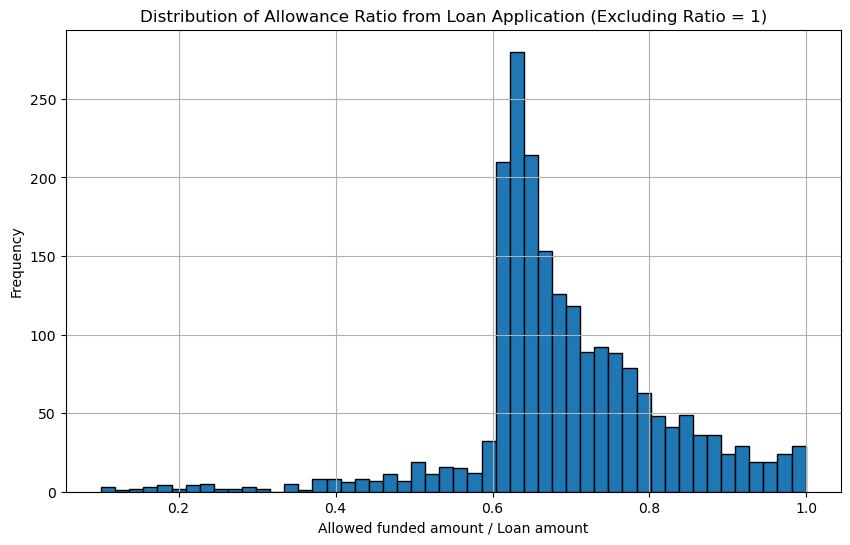

In [153]:
# Calculate the ratio of funded amount to loan amount
ratio = df_ac['funded_amnt'] / df_ac['loan_amnt']
# Calculate the ratio for the filtered DataFrame
filtered_ratio = df_ac[ratio != 1]['funded_amnt'] / df_ac[ratio != 1]['loan_amnt']
# Plot the histogram of the ratio
plt.figure(figsize=(10, 6))
plt.hist(filtered_ratio, bins=50, edgecolor='black')
plt.title('Distribution of Allowance Ratio from Loan Application (Excluding Ratio = 1)')
plt.xlabel('Allowed funded amount / Loan amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

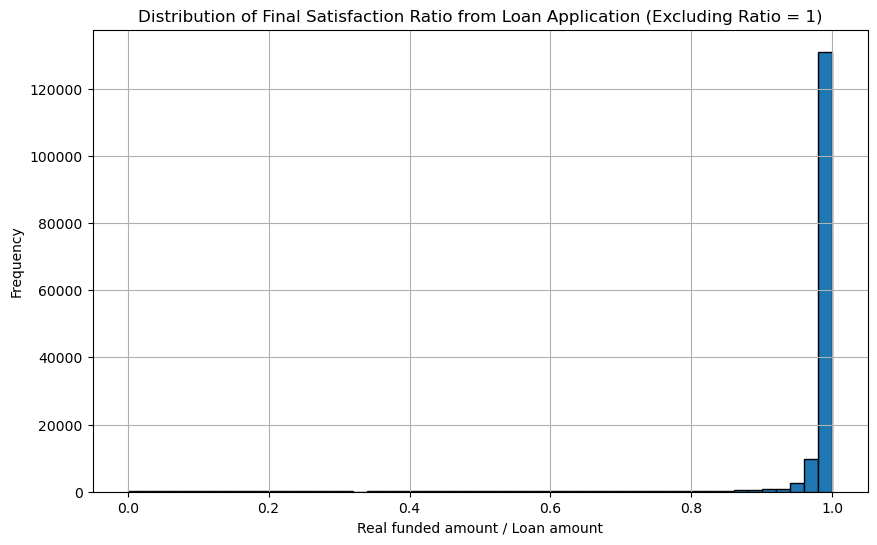

In [154]:
# Calculate the ratio of real funded amount to applied loan amount
ratio = df_ac['funded_amnt_inv'] / df_ac['loan_amnt']
# Calculate the ratio for the filtered DataFrame
filtered_ratio = df_ac[ratio != 1]['funded_amnt_inv'] / df_ac[ratio != 1]['loan_amnt']
# Plot the histogram of the ratio
plt.figure(figsize=(10, 6))
plt.hist(filtered_ratio, bins=50, edgecolor='black')
plt.title('Distribution of Final Satisfaction Ratio from Loan Application (Excluding Ratio = 1)')
plt.xlabel('Real funded amount / Loan amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

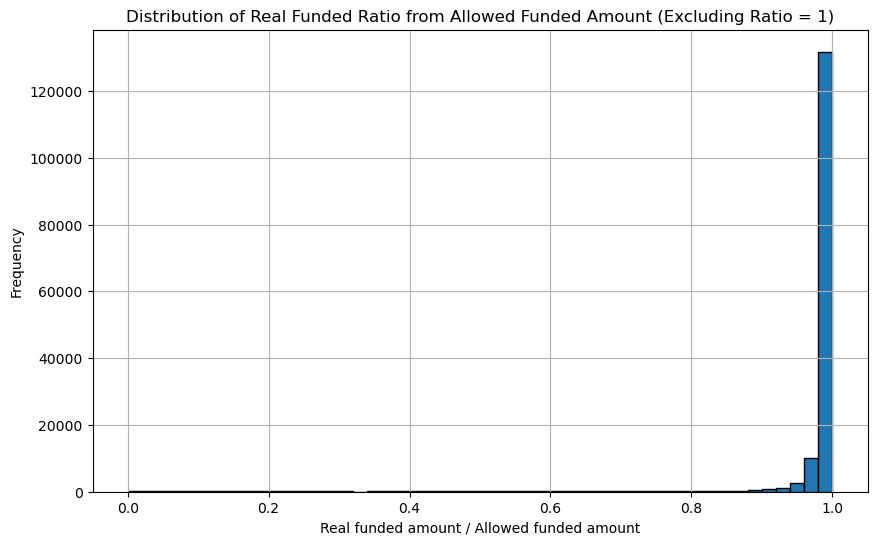

In [155]:
# Calculate the ratio of real funded amount to allowed funded amount
ratio = df_ac['funded_amnt_inv'] / df_ac['funded_amnt']
# Calculate the ratio for the filtered DataFrame
filtered_ratio = df_ac[ratio != 1]['funded_amnt_inv'] / df_ac[ratio != 1]['funded_amnt']
# Plot the histogram of the ratio
plt.figure(figsize=(10, 6))
plt.hist(filtered_ratio, bins=50, edgecolor='black')
plt.title('Distribution of Real Funded Ratio from Allowed Funded Amount (Excluding Ratio = 1)')
plt.xlabel('Real funded amount / Allowed funded amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [156]:
print(len(df_ac))

description = df_ac[df_ac['ratio_fund_loan'] != 1][['ratio_fund_loan']].describe()
nan_counts = df_ac[df_ac['ratio_fund_loan'] != 1][['ratio_fund_loan']].isna().sum()
description.loc['nan'] = nan_counts
print(description)
print(len(df_ac[df_ac['ratio_fund_loan'] != 1]), "~", round(len(df_ac[df_ac['ratio_fund_loan'] != 1])/len(df_ac)*100,3), "%\n")

description = df_ac[df_ac['ratio_fundinv_loan'] != 1][['ratio_fundinv_loan']].describe()
nan_counts = df_ac[df_ac['ratio_fundinv_loan'] != 1][['ratio_fundinv_loan']].isna().sum()
description.loc['nan'] = nan_counts
print(description)
print(len(df_ac[df_ac['ratio_fundinv_loan'] != 1]), "~", round(len(df_ac[df_ac['ratio_fundinv_loan'] != 1])/len(df_ac)*100,3), "%\n")

description = df_ac[df_ac['ratio_fundinv_fund'] != 1][['ratio_fundinv_fund']].describe()
nan_counts = df_ac[df_ac['ratio_fundinv_fund'] != 1][['ratio_fundinv_fund']].isna().sum()
description.loc['nan'] = nan_counts
print(description)
print(len(df_ac[df_ac['ratio_fundinv_fund'] != 1]), "~", round(len(df_ac[df_ac['ratio_fundinv_fund'] != 1])/len(df_ac)*100,3), "%")

2260668
       ratio_fund_loan
count       2065.00000
mean           0.69246
std            0.12715
min            0.10125
25%            0.62857
50%            0.67375
75%            0.76214
max            0.99909
nan            0.00000
2065 ~ 0.091 %

       ratio_fundinv_loan
count        151268.00000
mean              0.97367
std               0.10443
min               0.00000
25%               0.98980
50%               0.99615
75%               0.99821
max               1.00000
nan             233.00000
151501 ~ 6.702 %

       ratio_fundinv_fund
count        150878.00000
mean              0.97711
std               0.09781
min               0.00000
25%               0.99000
50%               0.99625
75%               0.99821
max               1.00000
nan             233.00000
151111 ~ 6.684 %


### <font color=red> Possible CONTROLs</font>

#### Check case by case
1. <font color=red>"revol_util": "revolving line utilization rate" (np.NaN: 1,802)</font>
- <font color=red>(High -> Bad signal)</font> the percentage of a borrower's available revolving credit (such as credit cards) that they are currently using
- According to the FICO website, credit utilization accounts for about 30% of a FICO score; "> 100%" possible
- <font color=blue>Problem: Outlier (MAX: 892.3, 366.6, 193.0, ... / upper_1%: 98.1)</font>

2. <font color=red>"revol_bal": "revolving balance" (np.NaN: 0)</font>
- <font color=red>(High -> Bad signal)</font> the total amount of money that a borrower currently owes on all their revolving credit accounts, such as credit cards
- the current outstanding balance on these revolving credit accounts (how much credit the borrower has used but not yet paid back)
- <font color=blue>Problem: Outlier (MAX: 2904836, ... / upper_1%: 97929.98)</font>
- <font color=blue>Problem: Log-transform (since $)</font>: <font color=red> ALREADY DID IN "2.Preprocessing (B)"</font>

3. <font color=red>"open_acc": "number of open accounts" (np.NaN: 29)</font>
- <font color=red>(?)</font> the total number of open credit accounts that a borrower currently has
- includes various types of credit lines such as credit cards (means Revolving credit accounts), installment loans, mortgages, and other revolving credit lines
- A high "open_acc" is not inherently good or bad; it depends
- <font color=blue>Problem: Outlier (MAX: 101, 97, 94, ... / upper_1%: 30)</font>

4. <font color=red>"total_acc": "total number of credit accounts that a borrower has" (np.NaN: 29)</font>
- <font color=red>(?)</font> the sum of all credit accounts that are open and closed (gives lenders an idea of the borrower’s credit history and their experience with various credit products)
- A higher number of accounts can be a positive indicator if the borrower has a good repayment history, but it can also be a concern if it suggests overextension
- A high "total_acc" is not inherently good or bad; it depends
- <font color=blue>Problem: Lack of Temporal Information: Addressed by using the "earliest_cr_line" ("credit_hist_y")</font>
- <font color=blue>Problem: Lack of Good/Bad Information (GOOD + BAD = Total): "acc_open_past_24mths" (recent credit activity and the borrower's behavior in seeking new credit)</font>
- Other supported variables: "avg_cur_bal", "open_acc", "mths_since_recent_bc", "mths_since_recent_inq", "mths_since_last_delinq", "revol_util", "total_bc_limit"
- <font color=blue>Problem: Outlier (MAX: 176, ... / upper_1%: 60)</font>

5. <font color=red>"delinq_2yrs": "number of these 30+ days past-due occurrences within the last two years" (np.NaN: 29)</font>
- <font color=red>(High -> Bad signal)</font> the number of 30+ days past-due delinquency occurrences in the borrower's credit file over the last 2 years
- <font color=blue>Problem: Outlier (MAX: 58, 42, 39, ... / upper_1%: 4)</font>

6. <font color=red>"inq_last_6mths": "Number of credit inquiries in the past 12 months" (np.NaN: 30)</font>
- <font color=red>(High -> Bad signal)</font> a record of when a potential lender or creditor checks a borrower's credit report as part of the credit application process
- Related variables: "mths_since_last_delinq" (number of months since the borrower's last delinquency), "pub_rec" (number of derogatory public records, such as bankruptcies or foreclosures, in the borrower's credit file)
- <font color=blue>Problem: Outlier (MAX: 33, 32, ... / upper_1%: 4)</font>

7. <font color=red>"bc_util": "bankcard utilization rate" (np.NaN: 76,071)</font>
- <font color=red>(High -> Bad signal)</font> ratio of the total current balance on all of the borrower's credit cards to the total credit limits of those cards
- "> 100%" possible
- <font color=blue>Problem: Outlier (MAX: 339.6318.2, 255.2, ... / upper_1%: 100.6)</font>


In [159]:
print(len(df_ac))
description = df_ac[['revol_util', 'revol_bal', 'open_acc', 'total_acc', 'delinq_2yrs', 'inq_last_6mths', 'bc_util']].describe()
nan_counts = df_ac[['revol_util', 'revol_bal', 'open_acc', 'total_acc', 'delinq_2yrs', 'inq_last_6mths', 'bc_util']].isna().sum()
description.loc['nan'] = nan_counts
description

2260668


,revol_util,revol_bal,open_acc,total_acc,delinq_2yrs,inq_last_6mths,bc_util
count,2258866.00000,2260668.00000,2260639.00000,2260639.00000,2260639.00000,2260638.00000,2184597.00000
mean,50.33770,16658.45808,11.61240,24.16255,0.30688,0.57684,57.89995
std,24.71307,22948.30503,5.64086,11.98753,0.86723,0.88596,28.58347
min,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,31.50000,5950.00000,8.00000,15.00000,0.00000,0.00000,35.40000
50%,50.30000,11324.00000,11.00000,22.00000,0.00000,0.00000,60.20000
75%,69.40000,20246.00000,14.00000,31.00000,0.00000,1.00000,83.10000
max,892.30000,2904836.00000,101.00000,176.00000,58.00000,33.00000,339.60000
nan,1802.00000,0.00000,29.00000,29.00000,29.00000,30.00000,76071.00000


In [160]:
percentiles = {}
for column in ['revol_util', 'revol_bal', 'open_acc', 'total_acc', 'delinq_2yrs', 'inq_last_6mths', 'bc_util']:
    lower_more2 = df_ac[column].quantile(0.0001) # 0.01%: 226
    lower_more = df_ac[column].quantile(0.001) # 0.1%: 2261
    lower = df_ac[column].quantile(0.01) # 1%: 22607
    upper = df_ac[column].quantile(0.99) # 99%: 22607
    upper_more = df_ac[column].quantile(0.999) # 99.9%: 2261
    upper_more2 = df_ac[column].quantile(0.9999) # 99.99%: 226
    percentiles[column] = {'lower_0.01%': lower_more2, 'lower_0.1%': lower_more, 'lower_1%': lower, 
                           'upper_1%': upper, 'upper_0.1%': upper_more, 'upper_0.01%': upper_more2}

percentiles_df = pd.DataFrame(percentiles) # If you want to transform the format: pd.DataFrame(percentiles).T
print(len(df_ac), "\n")
percentiles_df

2260668 



,revol_util,revol_bal,open_acc,total_acc,delinq_2yrs,inq_last_6mths,bc_util
lower_0.01%,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000,0.00000
lower_0.1%,0.00000,0.00000,2.00000,3.00000,0.00000,0.00000,0.00000
lower_1%,0.90000,126.00000,3.00000,5.00000,0.00000,0.00000,0.00000
upper_1%,98.10000,97929.98000,30.00000,60.00000,4.00000,4.00000,100.60000
upper_0.1%,102.10000,265894.33000,41.00000,80.00000,9.00000,5.00000,107.40000
upper_0.01%,117.20000,550449.92730,54.00000,103.00000,15.00000,8.00000,133.00000


In [161]:
df_ac.nlargest(10, 'revol_util')[['revol_util', 'revol_bal', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,revol_util,revol_bal,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1292889,892.30000,2677.00000,3500.00000,3500.00000,3500.00000,B,Fully Paid
1254583,366.60000,2566.00000,16500.00000,16500.00000,16500.00000,C,Charged Off
205263,193.00000,17770.00000,35000.00000,35000.00000,35000.00000,D,Fully Paid
451907,191.00000,14325.00000,20000.00000,20000.00000,20000.00000,B,Current
414612,184.60000,266444.00000,28000.00000,28000.00000,28000.00000,C,Fully Paid
1371642,183.80000,33029.00000,30000.00000,30000.00000,30000.00000,C,Current
108244,182.80000,14262.00000,12000.00000,12000.00000,12000.00000,C,Charged Off
1182064,180.30000,5408.00000,16000.00000,16000.00000,16000.00000,C,Charged Off
1206308,177.70000,7107.00000,15000.00000,15000.00000,15000.00000,D,Fully Paid
487964,175.00000,22770.00000,22000.00000,22000.00000,22000.00000,B,Current


In [162]:
df_ac.nlargest(10, 'revol_bal')[['revol_util', 'revol_bal', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,revol_util,revol_bal,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
289384,37.40000,2904836.00000,35000.00000,35000.00000,35000.00000,D,Fully Paid
1838654,20.40000,2568995.00000,28000.00000,28000.00000,28000.00000,A,Fully Paid
1187753,16.30000,2560703.00000,26200.00000,26200.00000,26200.00000,A,Fully Paid
2145264,17.40000,2559552.00000,40000.00000,40000.00000,40000.00000,A,Current
1387173,17.60000,2358150.00000,40000.00000,40000.00000,40000.00000,B,Current
1540444,95.70000,1830688.00000,35000.00000,35000.00000,35000.00000,B,Current
1417318,35.00000,1803041.00000,40000.00000,40000.00000,40000.00000,B,Current
1769221,38.60000,1746716.00000,35000.00000,35000.00000,35000.00000,C,Charged Off
1886958,29.50000,1743266.00000,35000.00000,35000.00000,34975.00000,B,Fully Paid
1691320,NaN,1698749.00000,40000.00000,40000.00000,40000.00000,A,Current


In [163]:
df_ac.nlargest(10, 'open_acc')[['revol_util', 'revol_bal', 'open_acc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,revol_util,revol_bal,open_acc,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1496752,6.30000,44493.00000,101.00000,35000.00000,35000.00000,35000.00000,B,Current
2175238,1.70000,143126.00000,97.00000,29375.00000,29375.00000,29375.00000,B,Current
1475810,28.50000,35682.00000,94.00000,28000.00000,28000.00000,28000.00000,C,Current
576762,7.10000,29891.00000,93.00000,12000.00000,12000.00000,12000.00000,A,Current
608137,6.70000,16405.00000,91.00000,36000.00000,36000.00000,36000.00000,C,Current
420529,1.90000,128940.00000,90.00000,30000.00000,30000.00000,30000.00000,C,Fully Paid
932553,37.20000,27201.00000,88.00000,12000.00000,12000.00000,12000.00000,G,Fully Paid
896016,14.00000,18183.00000,86.00000,20000.00000,20000.00000,20000.00000,C,Fully Paid
1564823,32.00000,125185.00000,86.00000,30000.00000,30000.00000,30000.00000,C,Current
1988700,20.40000,84391.00000,86.00000,25000.00000,25000.00000,25000.00000,A,Current


In [164]:
df_ac.nlargest(10, 'total_acc')[['revol_util', 'revol_bal', 'open_acc', 'total_acc', 
                                 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,revol_util,revol_bal,open_acc,total_acc,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1005423,55.50000,21206.00000,41.00000,176.00000,18000.00000,18000.00000,18000.00000,D,Charged Off
657075,12.00000,587.00000,9.00000,173.00000,6000.00000,6000.00000,6000.00000,C,Charged Off
152873,69.40000,21782.00000,37.00000,169.00000,12175.00000,12175.00000,12175.00000,D,Charged Off
2082307,28.90000,19588.00000,52.00000,165.00000,25000.00000,25000.00000,25000.00000,C,Current
397404,37.40000,12758.00000,45.00000,162.00000,35000.00000,35000.00000,34975.00000,E,Fully Paid
682374,87.10000,29975.00000,20.00000,160.00000,21000.00000,21000.00000,21000.00000,D,Current
1475810,28.50000,35682.00000,94.00000,160.00000,28000.00000,28000.00000,28000.00000,C,Current
714765,87.80000,51958.00000,12.00000,157.00000,24000.00000,24000.00000,24000.00000,B,Current
1136805,30.50000,488.00000,8.00000,156.00000,12075.00000,12075.00000,12075.00000,D,Fully Paid
444919,10.70000,25227.00000,69.00000,153.00000,29000.00000,29000.00000,29000.00000,C,Current


In [165]:
df_ac.nlargest(10, 'delinq_2yrs')[['delinq_2yrs', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,delinq_2yrs,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
790020,58.00000,9600.00000,9600.00000,9600.00000,A,Current
900778,42.00000,8000.00000,8000.00000,8000.00000,C,Current
316646,39.00000,12500.00000,12500.00000,12500.00000,D,Fully Paid
2074595,36.00000,35000.00000,35000.00000,35000.00000,D,Late (31-120 days)
841954,35.00000,10000.00000,10000.00000,10000.00000,C,Current
649435,32.00000,3000.00000,3000.00000,3000.00000,B,Current
57954,30.00000,15000.00000,15000.00000,15000.00000,C,Fully Paid
2122218,30.00000,5000.00000,5000.00000,5000.00000,C,Current
1844858,29.00000,2500.00000,2500.00000,2500.00000,C,Fully Paid
2221375,29.00000,25000.00000,25000.00000,25000.00000,E,Fully Paid


In [166]:
df_ac.nlargest(10, 'inq_last_6mths')[['inq_last_6mths', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,inq_last_6mths,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1653516,33.00000,7000.00000,7000.00000,NaN,E,NaN
1653707,32.00000,5100.00000,5100.00000,4027.30080,D,Charged Off
1654082,31.00000,3000.00000,3000.00000,363.13916,D,Fully Paid
1654093,28.00000,3000.00000,3000.00000,2225.00000,E,Fully Paid
1654100,27.00000,4800.00000,4800.00000,76.10000,C,Fully Paid
1654098,25.00000,5000.00000,5000.00000,500.00943,C,Charged Off
1653743,24.00000,3000.00000,3000.00000,2825.00000,D,Fully Paid
1654058,24.00000,1350.00000,1350.00000,702.93000,E,Fully Paid
1654120,20.00000,7200.00000,7200.00000,1849.99341,E,Charged Off
1654200,19.00000,19650.00000,19650.00000,5275.00000,G,Fully Paid


In [167]:
df_ac.nlargest(10, 'bc_util')[['bc_util', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'grade', 'loan_status']]

,bc_util,loan_amnt,funded_amnt,funded_amnt_inv,grade,loan_status
1771777,339.60000,10000.00000,10000.00000,10000.00000,D,Fully Paid
399811,318.20000,15000.00000,15000.00000,15000.00000,C,Fully Paid
1204248,255.20000,10000.00000,10000.00000,10000.00000,C,Charged Off
1745755,252.30000,5500.00000,5500.00000,5500.00000,B,Fully Paid
350601,243.80000,12000.00000,12000.00000,12000.00000,D,Charged Off
78047,235.30000,12000.00000,12000.00000,11875.00000,D,Charged Off
629885,215.70000,5000.00000,5000.00000,5000.00000,A,Current
405484,204.60000,6000.00000,6000.00000,6000.00000,C,Charged Off
1206308,202.90000,15000.00000,15000.00000,15000.00000,D,Fully Paid
205263,202.00000,35000.00000,35000.00000,35000.00000,D,Fully Paid


# <font color=blue>4. Rejected borrower data</font>

### Load

In [3]:
# Basic load and Set
df_rj = pd.read_csv('LC_rejected_2007_2018.csv', low_memory = False) # raw data import (original: 27,648,741 rows)

df_rj = df_rj.dropna(axis=1, how='all') # Remove 'member_id' column: all values are null
df_rj = df_rj.reset_index(drop = True)

print("# Sample = ", len(df_rj)) #; print("# Unique borrower id = ", df_rj['id'].nunique(dropna = False), "\n")
print(df_rj.info(), "\n"); print("==================") #; print(df_rj['issue_d'].value_counts())
df_rj

# Sample =  27648741
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB
None 



,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.00000,2007-05-26,Wedding Covered but No Honeymoon,693.00000,10%,481xx,NM,4 years,0.00000
1,1000.00000,2007-05-26,Consolidating Debt,703.00000,10%,010xx,MA,< 1 year,0.00000
2,11000.00000,2007-05-27,Want to consolidate my debt,715.00000,10%,212xx,MD,1 year,0.00000
3,6000.00000,2007-05-27,waksman,698.00000,38.64%,017xx,MA,< 1 year,0.00000
4,1500.00000,2007-05-27,mdrigo,509.00000,9.43%,209xx,MD,< 1 year,0.00000
...,...,...,...,...,...,...,...,...,...
27648736,10000.00000,2016-12-31,Debt consolidation,590.00000,41.26%,441xx,OH,< 1 year,0.00000
27648737,10000.00000,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.00000
27648738,1200.00000,2016-12-31,Other,686.00000,10.26%,914xx,CA,< 1 year,0.00000
27648739,25000.00000,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.00000


### Column settings

In [5]:
# Preprocessed data: column names
# To rename specific columns
df_rj = df_rj.rename(columns={'Amount Requested': 'loan_amnt',
                              'Application Date': 'issue_d', 
                              'Loan Title': 'purpose', 
                              'Risk_Score': 'fico_app', 
                              'Debt-To-Income Ratio': 'dti', 
                              'Zip Code': 'zip_code', 
                              'State': 'addr_state', 
                              'Employment Length': 'emp_length', 
                              'Policy Code': 'policy_code'}
                    )
df_rj.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   loan_amnt    27648741 non-null  float64
 1   issue_d      27648741 non-null  object 
 2   purpose      27647436 non-null  object 
 3   fico_app     9151111 non-null   float64
 4   dti          27648741 non-null  object 
 5   zip_code     27648448 non-null  object 
 6   addr_state   27648719 non-null  object 
 7   emp_length   26697386 non-null  object 
 8   policy_code  27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


### Preprocessing steps

#### 'issue_d'

In [8]:
# Convert 'issue_d' and 'earliest_cr_line' to datetime format
df_rj['issue_d'] = pd.to_datetime(df_rj['issue_d'])

# a-1. Year Indicator of 'issue_d' for fixed effects
df_rj['year_issue'] = df_rj['issue_d'].dt.year
# a-2. Year-Quarter Indicator of 'issue_d' for fixed effects
df_rj['yearq_issue'] = df_rj['issue_d'].dt.to_period('Q').astype(str)
# a-3. Year-Month Indicator of 'issue_d' for fixed effects
df_rj['yearm_issue'] = df_rj['issue_d'].dt.to_period('M').astype(str).str.replace('-', '')

# Output the DataFrame with the new columns
df_rj[['issue_d', 'year_issue', 'yearq_issue', 'yearm_issue']]

# YEAR Dummy
# print(df_rj['issue_Y'].value_counts().sort_index(ascending = True))
# df_rj['year'] = df_rj['issue_Y']
# df_rj = pd.get_dummies(df_rj, columns = ['year'])

,issue_d,year_issue,yearq_issue,yearm_issue
0,2007-05-26,2007,2007Q2,200705
1,2007-05-26,2007,2007Q2,200705
2,2007-05-27,2007,2007Q2,200705
3,2007-05-27,2007,2007Q2,200705
4,2007-05-27,2007,2007Q2,200705
...,...,...,...,...
27648736,2016-12-31,2016,2016Q4,201612
27648737,2016-12-31,2016,2016Q4,201612
27648738,2016-12-31,2016,2016Q4,201612
27648739,2016-12-31,2016,2016Q4,201612


#### 'dti'

In [10]:
# Make 'dti' column float-type (delete "%" & transform to float-type)
df_rj['dti'] = df_rj['dti'].str.rstrip('%').astype(float)

#### "emp_length"

In [12]:
print("# BEFORE # MISSING VALUES in 'emp_length' = ", df_rj['emp_length'].isnull().sum() )
print(df_rj['emp_length'].value_counts(dropna=False).sort_index(ascending = True))
print("==================")
name_mapping = {'10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6, '5 years': 5, 
                '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1, '< 1 year': 0}
# Apply the mapping function
df_rj['emp_length_num'] = df_rj['emp_length'].map(name_mapping)
# Convert to an integer type that allows NaN
df_rj['emp_length_num'] = df_rj['emp_length_num'].astype('Int64')

print("\n# AFTER # MISSING VALUES in 'emp_length' = ", df_rj['emp_length_num'].isnull().sum() )
print(df_rj['emp_length_num'].value_counts(dropna=False).sort_index(ascending = True))

# BEFORE # MISSING VALUES in 'emp_length' =  951355
emp_length
1 year         267840
10+ years      416384
2 years        199204
3 years        177344
4 years        121623
5 years       2279466
6 years         71625
7 years         55666
8 years         65965
9 years         47954
< 1 year     22994315
NaN            951355
Name: count, dtype: int64

# AFTER # MISSING VALUES in 'emp_length' =  951355
emp_length_num
0       22994315
1         267840
2         199204
3         177344
4         121623
5        2279466
6          71625
7          55666
8          65965
9          47954
10        416384
<NA>      951355
Name: count, dtype: Int64


#### 'policy_code'

In [14]:
df_rj['policy_code'].value_counts() 
# policy_code=2: does not meet the LendingClub's current policy & available to select institutional investors
# https://www.fintechnexus.com/policy-code-2-loans-lending-club/

policy_code
0.00000    27559694
2.00000       88129
Name: count, dtype: int64

In [15]:
df_rj[['year_issue', 'policy_code']].value_counts(dropna=False).sort_index(ascending=True) # Since 2014: policy_code = 2 exists

year_issue  policy_code
2007        0.00000           5274
2008        0.00000          25596
2009        0.00000          56991
2010        0.00000         112561
2011        0.00000         217792
2012        0.00000         337277
2013        0.00000         760942
2014        0.00000        1927459
            2.00000           6241
2015        0.00000        2850172
            2.00000           9207
2016        0.00000        4754618
            2.00000          15256
2017        0.00000        7053928
            2.00000          17727
            NaN                918
2018        0.00000        9457084
            2.00000          39698
Name: count, dtype: int64

#### 'purpose'

In [17]:
df_rj['purpose'] = df_rj['purpose'].str.lower()
df_rj['purpose'].value_counts(dropna = False)

purpose
debt consolidation                         6426196
debt_consolidation                         5895214
other                                      4698754
credit card refinancing                    2298367
credit_card                                1363406
                                            ...   
pay for student loans                            1
get my credit back in order                      1
15000 loan cashout                               1
refinance existing loan for better rate          1
business advertising loan                        1
Name: count, Length: 65686, dtype: int64

In [18]:
# Replace values consisting only of (whitespace, special characters, or numbers) with np.nan
print(df_rj[df_rj['purpose'] == ' ']) # e.g.

# Function to check if the value should be replaced with np.nan
def should_replace_with_nan(value):
    if value is None or pd.isna(value):  # Check for None or NaN
        return True
    if isinstance(value, str):  # Ensure the value is a string
        stripped_value = value.strip()  # Strip leading/trailing whitespace
        # Check if the stripped value is empty or contains only special characters or numbers
        if stripped_value == '' or re.fullmatch(r'[\W\d_]+', stripped_value):
            return True
    return False

# Apply the function to the 'purpose' column
df_rj['purpose'] = df_rj['purpose'].apply(lambda x: np.nan if should_replace_with_nan(x) else x)
print("# of null values in 'purpose' =", df_rj['purpose'].isna().sum())
print("# of observations =", len(df_rj))

        loan_amnt    issue_d purpose  fico_app         dti zip_code  \
15236 23000.00000 2008-04-17               NaN     0.00000    927xx   
15298 20000.00000 2008-04-18         709.00000     0.59000    104xx   
15318 23000.00000 2008-04-19         790.00000     0.19000    980xx   
15407  8000.00000 2008-04-21         773.00000    42.80000    630xx   
15413  5000.00000 2008-04-21         680.00000     6.39000    076xx   
...           ...        ...     ...       ...         ...      ...   
97087 15000.00000 2010-02-24               NaN 99999.00000    442xx   
97088 30000.00000 2010-02-24         673.00000    30.93000    961xx   
97091  5000.00000 2010-02-24         700.00000    27.79000    757xx   
97092 10000.00000 2010-02-24         667.00000    28.76000    172xx   
97095  1500.00000 2010-02-24         688.00000     0.90000    083xx   

      addr_state emp_length  policy_code  year_issue yearq_issue yearm_issue  \
15236         CA     1 year      0.00000        2008      2008Q2   

In [19]:
df_rj['purpose'].value_counts(dropna = False)

purpose
debt consolidation                      6426196
debt_consolidation                      5895214
other                                   4698754
credit card refinancing                 2298367
credit_card                             1363406
                                         ...   
interim living expenses                       1
rings and debt                                1
paying back friends money i own them          1
please help me finish school                  1
business advertising loan                     1
Name: count, Length: 65570, dtype: int64

In [20]:
print( df_rj['purpose'].value_counts().head(30).sum(), "(",
      round(df_rj['purpose'].value_counts().head(30).sum()/len(df_rj) * 100,3), "% )")

27504077 ( 99.477 % )


### Rejected dataset after preprocessing

In [22]:
# Check the preprocess result #
df_rj.reset_index(drop = True, inplace = True) # cleansing the index
print(df_rj.info()); df_rj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   loan_amnt       float64       
 1   issue_d         datetime64[ns]
 2   purpose         object        
 3   fico_app        float64       
 4   dti             float64       
 5   zip_code        object        
 6   addr_state      object        
 7   emp_length      object        
 8   policy_code     float64       
 9   year_issue      int32         
 10  yearq_issue     object        
 11  yearm_issue     object        
 12  emp_length_num  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(4), int32(1), object(6)
memory usage: 2.6+ GB
None


,loan_amnt,issue_d,purpose,fico_app,dti,zip_code,addr_state,emp_length,policy_code,year_issue,yearq_issue,yearm_issue,emp_length_num
0,1000.00000,2007-05-26,wedding covered but no honeymoon,693.00000,10.00000,481xx,NM,4 years,0.00000,2007,2007Q2,200705,4
1,1000.00000,2007-05-26,consolidating debt,703.00000,10.00000,010xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0
2,11000.00000,2007-05-27,want to consolidate my debt,715.00000,10.00000,212xx,MD,1 year,0.00000,2007,2007Q2,200705,1
3,6000.00000,2007-05-27,waksman,698.00000,38.64000,017xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0
4,1500.00000,2007-05-27,mdrigo,509.00000,9.43000,209xx,MD,< 1 year,0.00000,2007,2007Q2,200705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27648736,10000.00000,2016-12-31,debt consolidation,590.00000,41.26000,441xx,OH,< 1 year,0.00000,2016,2016Q4,201612,0
27648737,10000.00000,2016-12-31,moving,NaN,1.48000,207xx,MD,5 years,0.00000,2016,2016Q4,201612,5
27648738,1200.00000,2016-12-31,other,686.00000,10.26000,914xx,CA,< 1 year,0.00000,2016,2016Q4,201612,0
27648739,25000.00000,2016-12-31,debt_consolidation,NaN,17.71000,880xx,NM,< 1 year,0.00000,2016,2016Q4,201612,0


# 5. BERT Match

### "purpose" (df_rj)

In [193]:
from BERT_match import bert_matching # BERT_match.py

C:\Users\hwwoo\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [194]:
# FROM rejected borrowers
# title category
value_counts = df_rj['purpose'].value_counts()
# value_counts --> DataFrame
df_purpose_rj = value_counts.reset_index()
# column_name
df_purpose_rj.columns = ['purpose_rj', 'count']
df_purpose_rj

,purpose_rj,count
0,debt consolidation,6426196
1,debt_consolidation,5895214
2,other,4698754
3,credit card refinancing,2298367
4,credit_card,1363406
...,...,...
65564,interim living expenses,1
65565,rings and debt,1
65566,paying back friends money i own them,1
65567,please help me finish school,1


In [195]:
# FROM accepted borrowers
# title category
value_counts = df_ac['purpose'].value_counts()
# value_counts --> DataFrame
df_purpose_ac = value_counts.reset_index()
# column_name
df_purpose_ac.columns = ['purpose_ac', 'count']
df_purpose_ac

,purpose_ac,count
0,debt_consolidation,1277877
1,credit_card,516971
2,home_improvement,150457
3,other,139440
4,major_purchase,50445
5,medical,27488
6,small_business,24689
7,car,24013
8,vacation,15525
9,moving,15403


In [196]:
# Perform BERT matching with removing empty rows
rj_purpose_match = bert_matching(df_purpose_rj, df_purpose_ac, 'purpose_rj', 'purpose_ac', remove_empty=True) # 5 min 29 sec
rj_purpose_match["sim_score_BERT"] = round(rj_purpose_match["sim_score_BERT"], 3)
# Display the results
print("Result with removing empty rows:")
rj_purpose_match.to_pickle('rj_purpose_match.pkl')
rj_purpose_match

Starting time: 19:52:30, 2024-07-06
Ending time: 19:56:53, 2024-07-06
 => BERT-based matching runtime: 4 min 23 sec
Result with removing empty rows:


,purpose_rj,purpose_ac,sim_score_BERT
0,debt consolidation,debt_consolidation,94.70900
1,debt_consolidation,debt_consolidation,100.00000
2,other,other,100.00000
3,credit card refinancing,credit_card,48.37400
4,credit_card,credit_card,100.00000
...,...,...,...
65564,interim living expenses,debt_consolidation,27.16900
65565,rings and debt,debt_consolidation,52.81200
65566,paying back friends money i own them,major_purchase,22.93500
65567,please help me finish school,educational,42.78300


### "purpose" (df_rj): results & merge

In [198]:
print( rj_purpose_match['purpose_ac'].value_counts().sum() )
print( rj_purpose_match['purpose_ac'].value_counts() )
# You can make some 'purpose's "other" when their similarity scores are lower than the criteria (e.g. 80%)

65569
purpose_ac
debt_consolidation    16554
credit_card            7795
house                  6215
car                    5974
educational            5144
small_business         3945
other                  3253
medical                3194
moving                 2789
home_improvement       2771
major_purchase         2660
vacation               2347
renewable_energy       1637
wedding                1291
Name: count, dtype: int64


In [199]:
print( (rj_purpose_match[rj_purpose_match['sim_score_BERT']>=80])['purpose_ac'].value_counts().sum() )
print( (rj_purpose_match[rj_purpose_match['sim_score_BERT']>=80])['purpose_ac'].value_counts() )

1090
purpose_ac
debt_consolidation    779
home_improvement       90
wedding                60
vacation               44
credit_card            21
moving                 16
small_business         15
medical                14
house                  13
car                    11
major_purchase         11
educational            10
other                   3
renewable_energy        3
Name: count, dtype: int64


In [200]:
print( (rj_purpose_match[rj_purpose_match['sim_score_BERT']>=50])['purpose_ac'].value_counts().sum() )
print( (rj_purpose_match[rj_purpose_match['sim_score_BERT']>=50])['purpose_ac'].value_counts() )

15465
purpose_ac
debt_consolidation    6941
credit_card           3124
house                  844
car                    837
home_improvement       770
small_business         619
wedding                598
educational            595
moving                 397
medical                333
vacation               228
major_purchase         126
renewable_energy        32
other                   21
Name: count, dtype: int64


In [30]:
# rj_purpose_match = pd.read_pickle("rj_purpose_match.pkl")
df_rj = pd.merge(df_rj, rj_purpose_match, left_on='purpose', right_on='purpose_rj', how='left'); del rj_purpose_match
df_rj.drop(columns=['purpose_rj'], inplace=True)
df_rj

,loan_amnt,issue_d,purpose,fico_app,dti,zip_code,addr_state,emp_length,policy_code,year_issue,yearq_issue,yearm_issue,emp_length_num,purpose_ac,sim_score_BERT
0,1000.00000,2007-05-26,wedding covered but no honeymoon,693.00000,10.00000,481xx,NM,4 years,0.00000,2007,2007Q2,200705,4,wedding,60.88700
1,1000.00000,2007-05-26,consolidating debt,703.00000,10.00000,010xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0,debt_consolidation,78.84700
2,11000.00000,2007-05-27,want to consolidate my debt,715.00000,10.00000,212xx,MD,1 year,0.00000,2007,2007Q2,200705,1,debt_consolidation,77.59500
3,6000.00000,2007-05-27,waksman,698.00000,38.64000,017xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0,house,25.38800
4,1500.00000,2007-05-27,mdrigo,509.00000,9.43000,209xx,MD,< 1 year,0.00000,2007,2007Q2,200705,0,medical,31.91200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27648736,10000.00000,2016-12-31,debt consolidation,590.00000,41.26000,441xx,OH,< 1 year,0.00000,2016,2016Q4,201612,0,debt_consolidation,94.70900
27648737,10000.00000,2016-12-31,moving,NaN,1.48000,207xx,MD,5 years,0.00000,2016,2016Q4,201612,5,moving,100.00000
27648738,1200.00000,2016-12-31,other,686.00000,10.26000,914xx,CA,< 1 year,0.00000,2016,2016Q4,201612,0,other,100.00000
27648739,25000.00000,2016-12-31,debt_consolidation,NaN,17.71000,880xx,NM,< 1 year,0.00000,2016,2016Q4,201612,0,debt_consolidation,100.00000


In [202]:
df_rj[df_rj['purpose'] ==' ']

,loan_amnt,issue_d,purpose,fico_app,dti,zip_code,addr_state,emp_length,policy_code,year_issue,yearq_issue,yearm_issue,emp_length_num,purpose_ac,sim_score_BERT


### "emp_title" (df_ac)
- "SOC titles" refers to the "Standard Occupational Classification" titles. The SOC system is used by federal statistical agencies in the United States to classify workers into occupational categories for the purpose of collecting, calculating, or disseminating data.

In [204]:
soc = pd.read_excel('soc_2010_to_2018_crosswalk.xlsx', engine = 'openpyxl')
soc # Note: some SOC Codes have same SOC Titles

,2018 SOC Code,2018 SOC Title
0,11-1011,Chief Executives
1,11-1021,General and Operations Managers
2,11-1031,Legislators
3,11-2011,Advertising and Promotions Managers
4,11-2021,Marketing Managers
...,...,...
895,55-3015,Command and Control Center Specialists
896,55-3016,Infantry
897,17-3029,"Engineering Technologists and Technicians, Exc..."
898,55-3018,Special Forces


In [205]:
print("# of original rows =",soc['2018 SOC Title'].nunique())
# Delete duplicate in the '2018 SOC Title' column
soc = soc.drop_duplicates(subset='2018 SOC Title', keep='first').reset_index(drop = True)
print("# of new rows =",len(soc))

# of original rows = 867
# of new rows = 867


In [206]:
# FROM accepted borrowers
# title category
value_counts = df_ac['emp_title'].value_counts()
# value_counts --> DataFrame
df_emp_title_ac = value_counts.reset_index()
# column_name
df_emp_title_ac.columns = ['emp_title', 'count']
df_emp_title_ac

,emp_title,count
0,Teacher,38824
1,Manager,34298
2,Owner,21977
3,Registered Nurse,15867
4,Driver,14753
...,...,...
512614,Assistant Demand Planner,1
512615,Student Academic Services Associate,1
512616,Pharmacy Scheduler,1
512617,Benefit Configuration Specialist,1


In [207]:
# Perform BERT matching with removing empty rows
ac_emp_title_match = bert_matching(df_emp_title_ac, soc, 'emp_title', '2018 SOC Title', remove_empty=True)
ac_emp_title_match["sim_score_BERT"] = round(ac_emp_title_match["sim_score_BERT"], 3)
# Display the results
print("Result with removing empty rows:")
ac_emp_title_match.to_pickle('ac_emp_title_match.pkl')
ac_emp_title_match

Starting time: 19:57:47, 2024-07-06
Ending time: 20:22:06, 2024-07-06
 => BERT-based matching runtime: 24 min 18 sec
Result with removing empty rows:


,emp_title,2018 SOC Title,sim_score_BERT
0,Teacher,"Teachers and Instructors, All Other",69.25300
1,Manager,"Managers, All Other",80.18100
2,Owner,Chief Executives,41.32300
3,Registered Nurse,Registered Nurses,95.65300
4,Driver,Taxi Drivers,55.69500
...,...,...,...
512614,Assistant Demand Planner,"Production, Planning, and Expediting Clerks",52.05700
512615,Student Academic Services Associate,"Education Administrators, Postsecondary",57.46600
512616,Pharmacy Scheduler,Pharmacists,66.60700
512617,Benefit Configuration Specialist,Computer User Support Specialists,52.74900


### "emp_title" (df_ac): results & merge

In [209]:
ac_emp_title_match['2018 SOC Title'].value_counts()

2018 SOC Title
Administrative Services Managers                                                   8845
Sales Managers                                                                     7270
Instructional Coordinators                                                         7157
Customer Service Representatives                                                   6507
Chief Executives                                                                   5853
                                                                                   ... 
Anthropology and Archeology Teachers, Postsecondary                                   5
Industrial-Organizational Psychologists                                               5
Secretaries and Administrative Assistants, Except Legal, Medical, and Executive       2
Middle School Teachers, Except Special and Career/Technical Education                 1
Secondary School Teachers, Except Special and Career/Technical Education              1
Name: count, Leng

In [210]:
print( ac_emp_title_match['2018 SOC Title'].value_counts().sum() )
print( ac_emp_title_match['2018 SOC Title'].value_counts() )
# You can make some 'emp_title's "other" when their similarity scores are lower than the criteria (e.g. 80%)

512619
2018 SOC Title
Administrative Services Managers                                                   8845
Sales Managers                                                                     7270
Instructional Coordinators                                                         7157
Customer Service Representatives                                                   6507
Chief Executives                                                                   5853
                                                                                   ... 
Anthropology and Archeology Teachers, Postsecondary                                   5
Industrial-Organizational Psychologists                                               5
Secretaries and Administrative Assistants, Except Legal, Medical, and Executive       2
Middle School Teachers, Except Special and Career/Technical Education                 1
Secondary School Teachers, Except Special and Career/Technical Education              1
Name: coun

In [211]:
print( (ac_emp_title_match[ac_emp_title_match['sim_score_BERT']>=80])['2018 SOC Title'].value_counts().sum() )
print( (ac_emp_title_match[ac_emp_title_match['sim_score_BERT']>=80])['2018 SOC Title'].value_counts() )

16153
2018 SOC Title
Sales Managers                                                               575
Project Management Specialists (##)                                          388
Food Service Managers                                                        321
Registered Nurses                                                            298
Financial Managers                                                           286
                                                                            ... 
Postal Service Mail Sorters, Processors, and Processing Machine Operators      1
Cooks, Private Household                                                       1
Mechanical Door Repairers                                                      1
Career/Technical Education Teachers, Postsecondary                             1
Cabinetmakers and Bench Carpenters                                             1
Name: count, Length: 530, dtype: int64


In [212]:
print( (ac_emp_title_match[ac_emp_title_match['sim_score_BERT']>=50])['2018 SOC Title'].value_counts().sum() )
print( (ac_emp_title_match[ac_emp_title_match['sim_score_BERT']>=50])['2018 SOC Title'].value_counts() )

306679
2018 SOC Title
Administrative Services Managers                                                                             7240
Sales Managers                                                                                               6321
Instructional Coordinators                                                                                   6215
Customer Service Representatives                                                                             4863
Project Management Specialists (##)                                                                          4689
                                                                                                             ... 
Middle School Teachers, Except Special and Career/Technical Education                                           1
Grinding, Lapping, Polishing, and Buffing Machine Tool Setters, Operators, and Tenders, Metal and Plastic       1
Secondary School Teachers, Except Special and Career/Technical Edu

In [213]:
# ac_emp_title_match = pd.read_pickle("ac_emp_title_match.pkl")
df_ac = pd.merge(df_ac, ac_emp_title_match, on='emp_title', how='left'); del ac_emp_title_match
df_ac = df_ac.rename(columns={'2018 SOC Title': 'emp_title_soc'})
df_ac

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,full_fund_loan,full_fundinv_loan,full_fundinv_fund,emp_length_num,vrf,vrf_num,vrf_s,individual,emp_title_soc,sim_score_BERT
0,68407277,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,leadman,...,1,1,1,10,0,0,0,1,Chief Executives,42.05400
1,68355089,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,Engineer,...,1,1,1,10,0,0,0,0,"Engineers, All Other",85.68000
2,68341763,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,truck driver,...,1,1,1,10,0,0,0,1,Light Truck Drivers,82.05800
3,66310712,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,Information Systems Officer,...,1,1,1,10,1,2,1,1,Computer and Information Systems Managers,78.04100
4,68476807,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,Contract Specialist,...,1,1,1,3,1,2,1,1,Labor Relations Specialists,60.76400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,89885898,24000.00000,24000.00000,24000.00000,60 months,12.79000,543.50000,C,C1,Unit Operator,...,1,1,1,7,1,2,1,1,"Service Unit Operators, Oil and Gas",51.41600
2260664,88977788,24000.00000,24000.00000,24000.00000,60 months,10.49000,515.74000,B,B3,Database Administrator,...,1,1,1,10,0,0,0,1,Database Administrators,94.95600
2260665,88985880,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,Vice President,...,1,1,1,9,1,1,0,1,"Office Clerks, General",42.16400
2260666,88224441,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,Program Manager,...,1,1,1,6,0,0,0,1,Computer and Information Systems Managers,59.53200


# <font color=blue>6. Add other columns (macro)</font>
- https://fred.stlouisfed.org/series/FEDFUNDS
- https://fred.stlouisfed.org/series/DGS10
- https://fred.stlouisfed.org/series/UNRATE

In [36]:
df_macro = pd.read_excel('macro_variables_2007_2018.xlsx') # macro variables (Source: https://fred.stlouisfed.org/)
df_macro

,yearm_issue,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield_10y
0,200701,4.60000,5.25000,4.79429,4.75286,4.75952
1,200702,4.50000,5.26000,4.75368,4.71053,4.72263
2,200703,4.40000,5.26000,4.50636,4.48091,4.56455
3,200704,4.50000,5.25000,4.60143,4.59333,4.69381
4,200705,4.40000,5.25000,4.69364,4.66727,4.74636
...,...,...,...,...,...,...
139,201808,3.80000,1.91000,2.70957,2.76783,2.88913
140,201809,3.70000,1.95000,2.83737,2.89368,3.00421
141,201810,3.80000,2.19000,2.93591,3.00045,3.15227
142,201811,3.80000,2.20000,2.90750,2.94700,3.11700


In [40]:
# print(df_ac['yearm_issue'].dtype) # object (Str)
# print(df_rj['yearm_issue'].dtype) # object (Str)
print(df_macro['yearm_issue'].dtype) # int64
df_macro['yearm_issue'] = df_macro['yearm_issue'].astype(str)
print(df_macro['yearm_issue'].dtype) # object (Str)

int64
object


In [280]:
# Accepted borrowers: Merge and make a variable
df_ac = pd.merge(df_ac.copy(), df_macro, how='left',on='yearm_issue')
df_ac['treasury_yield'] = np.where(df_ac['term_60mth'] == 1, df_ac['treasury_yield_5y'], df_ac['treasury_yield_3y'])
# Check
df_ac[["yearm_issue", "unrate_m", "funds_rate_m", "treasury_yield_3y", "treasury_yield_5y", "treasury_yield", "treasury_yield_10y", "term_60mth"]]

,yearm_issue,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield,treasury_yield_10y,term_60mth
0,201512,5.00000,0.24000,1.28045,1.69864,1.28045,2.24273,0
1,201512,5.00000,0.24000,1.28045,1.69864,1.28045,2.24273,0
2,201512,5.00000,0.24000,1.28045,1.69864,1.69864,2.24273,1
3,201512,5.00000,0.24000,1.28045,1.69864,1.69864,2.24273,1
4,201512,5.00000,0.24000,1.28045,1.69864,1.69864,2.24273,1
...,...,...,...,...,...,...,...,...
2260663,201610,4.90000,0.40000,0.98900,1.27200,1.27200,1.76450,1
2260664,201610,4.90000,0.40000,0.98900,1.27200,1.27200,1.76450,1
2260665,201610,4.90000,0.40000,0.98900,1.27200,1.27200,1.76450,1
2260666,201610,4.90000,0.40000,0.98900,1.27200,1.27200,1.76450,1


In [42]:
# Rejected borrowers: Merge (there is no "term_60mth" variable in the rejected borrower dataset)
df_rj = pd.merge(df_rj.copy(), df_macro, how='left', on='yearm_issue')
# Check
df_rj[["yearm_issue", "unrate_m", "funds_rate_m", "treasury_yield_3y", "treasury_yield_5y", "treasury_yield_10y"]]

,yearm_issue,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield_10y
0,200705,4.40000,5.25000,4.69364,4.66727,4.74636
1,200705,4.40000,5.25000,4.69364,4.66727,4.74636
2,200705,4.40000,5.25000,4.69364,4.66727,4.74636
3,200705,4.40000,5.25000,4.69364,4.66727,4.74636
4,200705,4.40000,5.25000,4.69364,4.66727,4.74636
...,...,...,...,...,...,...
27648736,201612,4.70000,0.54000,1.49476,1.95905,2.49190
27648737,201612,4.70000,0.54000,1.49476,1.95905,2.49190
27648738,201612,4.70000,0.54000,1.49476,1.95905,2.49190
27648739,201612,4.70000,0.54000,1.49476,1.95905,2.49190


# <font color=green>Final Save</font>

In [296]:
df_ac # Final checks: accepted borrowers

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,vrf_s,individual,emp_title_soc,sim_score_BERT,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield_10y,treasury_yield
0,68407277,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,leadman,...,0,1,Chief Executives,42.05400,5.00000,0.24000,1.28045,1.69864,2.24273,1.28045
1,68355089,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,Engineer,...,0,0,"Engineers, All Other",85.68000,5.00000,0.24000,1.28045,1.69864,2.24273,1.28045
2,68341763,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,truck driver,...,0,1,Light Truck Drivers,82.05800,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
3,66310712,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,Information Systems Officer,...,1,1,Computer and Information Systems Managers,78.04100,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
4,68476807,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,Contract Specialist,...,1,1,Labor Relations Specialists,60.76400,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,89885898,24000.00000,24000.00000,24000.00000,60 months,12.79000,543.50000,C,C1,Unit Operator,...,1,1,"Service Unit Operators, Oil and Gas",51.41600,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260664,88977788,24000.00000,24000.00000,24000.00000,60 months,10.49000,515.74000,B,B3,Database Administrator,...,0,1,Database Administrators,94.95600,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260665,88985880,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,Vice President,...,0,1,"Office Clerks, General",42.16400,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260666,88224441,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,Program Manager,...,0,1,Computer and Information Systems Managers,59.53200,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200


In [302]:
df_ac.to_pickle('df_ac_240705.pkl')

In [44]:
df_rj # Final checks: rejected borrowers

,loan_amnt,issue_d,purpose,fico_app,dti,zip_code,addr_state,emp_length,policy_code,year_issue,yearq_issue,yearm_issue,emp_length_num,purpose_ac,sim_score_BERT,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield_10y
0,1000.00000,2007-05-26,wedding covered but no honeymoon,693.00000,10.00000,481xx,NM,4 years,0.00000,2007,2007Q2,200705,4,wedding,60.88700,4.40000,5.25000,4.69364,4.66727,4.74636
1,1000.00000,2007-05-26,consolidating debt,703.00000,10.00000,010xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0,debt_consolidation,78.84700,4.40000,5.25000,4.69364,4.66727,4.74636
2,11000.00000,2007-05-27,want to consolidate my debt,715.00000,10.00000,212xx,MD,1 year,0.00000,2007,2007Q2,200705,1,debt_consolidation,77.59500,4.40000,5.25000,4.69364,4.66727,4.74636
3,6000.00000,2007-05-27,waksman,698.00000,38.64000,017xx,MA,< 1 year,0.00000,2007,2007Q2,200705,0,house,25.38800,4.40000,5.25000,4.69364,4.66727,4.74636
4,1500.00000,2007-05-27,mdrigo,509.00000,9.43000,209xx,MD,< 1 year,0.00000,2007,2007Q2,200705,0,medical,31.91200,4.40000,5.25000,4.69364,4.66727,4.74636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27648736,10000.00000,2016-12-31,debt consolidation,590.00000,41.26000,441xx,OH,< 1 year,0.00000,2016,2016Q4,201612,0,debt_consolidation,94.70900,4.70000,0.54000,1.49476,1.95905,2.49190
27648737,10000.00000,2016-12-31,moving,NaN,1.48000,207xx,MD,5 years,0.00000,2016,2016Q4,201612,5,moving,100.00000,4.70000,0.54000,1.49476,1.95905,2.49190
27648738,1200.00000,2016-12-31,other,686.00000,10.26000,914xx,CA,< 1 year,0.00000,2016,2016Q4,201612,0,other,100.00000,4.70000,0.54000,1.49476,1.95905,2.49190
27648739,25000.00000,2016-12-31,debt_consolidation,NaN,17.71000,880xx,NM,< 1 year,0.00000,2016,2016Q4,201612,0,debt_consolidation,100.00000,4.70000,0.54000,1.49476,1.95905,2.49190


In [45]:
df_rj.to_pickle('df_rj_240705.pkl')

# <font color=green>Appendix</font>

## <font color=blue>Appendix A. All Columns</font>

#### Preprocessed data with only columns without missing values

In [304]:
# Columns without missing values (after preprocessing)
df_ac.columns[df_ac.notnull().all()].tolist()

['id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'fico_range_low',
 'fico_range_high',
 'revol_bal',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'policy_code',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'fico_app',
 'fico_last',
 'year_issue',
 'yearq_issue',
 'yearm_issue',
 'grade_num',
 'sub_grade_num',
 'term_60mth',
 'loan_amnt_log',
 'loan_amnt_natlog',
 'loan_amnt_10k',
 'revol_bal1_log',
 'revol_bal1_natlog',
 'revol_bal_10k',
 'ratio_fund_loan',
 'full_fund_loan',
 'full_fundinv_loan',
 'full_fundinv_fund',
 'vrf',
 'vrf_num',
 'vrf_s',
 'individual',
 'unrate_m',
 'fu

In [50]:
# Columns without missing values (after preprocessing)
df_rj.columns[df_rj.notnull().all()].tolist()

['loan_amnt',
 'issue_d',
 'dti',
 'year_issue',
 'yearq_issue',
 'yearm_issue',
 'unrate_m',
 'funds_rate_m',
 'treasury_yield_3y',
 'treasury_yield_5y',
 'treasury_yield_10y']

#### Preprocessed data

In [305]:
# Preprocessed data
df_ac.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 194 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260668 non-null  object 
 1    loan_amnt                                   2260668 non-null  float64
 2    funded_amnt                                 2260668 non-null  float64
 3    funded_amnt_inv                             2260435 non-null  float64
 4    term                                        2260668 non-null  object 
 5    int_rate                                    2260668 non-null  float64
 6    installment                                 2260668 non-null  float64
 7    grade                                       2260668 non-null  object 
 8    sub_grade                                   2260668 non-null  object 
 9    emp_title                                   

In [51]:
# Preprocessed data
df_rj.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 20 columns):
 #   Column              Non-Null Count     Dtype         
---  ------              --------------     -----         
 0   loan_amnt           27648741 non-null  float64       
 1   issue_d             27648741 non-null  datetime64[ns]
 2   purpose             27632006 non-null  object        
 3   fico_app            9151111 non-null   float64       
 4   dti                 27648741 non-null  float64       
 5   zip_code            27648448 non-null  object        
 6   addr_state          27648719 non-null  object        
 7   emp_length          26697386 non-null  object        
 8   policy_code         27647823 non-null  float64       
 9   year_issue          27648741 non-null  int32         
 10  yearq_issue         27648741 non-null  object        
 11  yearm_issue         27648741 non-null  object        
 12  emp_length_num      26697386 non-null  Int64         


#### Raw data

In [55]:
# Raw data
df_ac.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

## <font color=blue>Appendix B. Additional Ideas</font>

## "verification": verification of a borrower's income and employment information
- "Source Verified": LC has verified the borrower’s income and/or employment information through third-party sources (highest confidence in the accuracy)
    -  using external services or documentation to cross-check the information provided by the borrower, such as contacting employers directly or using tax documents
- "Verified": LC has confirmed the borrower’s income and/or employment information, but not necessarily through the most rigorous third-party sources (a moderate level of confidence in the borrower’s reported information)
    - checking the information against pay stubs, bank statements, or other documentation provided by the borrower
- "Not Verified": LC has not verified (least confidence in the accuracy of the borrower’s reported information, potentially representing a higher risk)
    - The information provided by the borrower has not been checked against any documentation or third-party sources

https://www.lendingclub.com/public/income-verification.action

https://www.lendingclub.com/help/investing-faq/what-do-the-different-note-statuses-mean

## Verification and Borrower Risk
1. Selective Verification: Lending platforms like LendingClub often perform income verification selectively based on certain risk factors. This selective process means that applications flagged for verification may have raised some initial concerns or inconsistencies.
    - Risk-based Selection: According to LendingClub’s practices, they may verify income if there are discrepancies or if the income stated appears unusually high relative to the borrower’s job title. They also conduct random verifications for testing purposes (LendingClub).

2. Higher Risk Profile: Studies have shown that loans requiring income verification can sometimes have higher default rates compared to loans that did not require verification. This might seem counterintuitive, but it suggests that loans flagged for verification were initially considered higher risk.
    - Evidence from LendingClub: Data from LendingClub indicates that loans without income verification have historically had lower charge-off rates compared to those that were income or source verified (LendingClub).

3. Fraud Detection: Verification processes are part of fraud detection mechanisms. Borrowers whose applications are flagged for verification might be those with potentially suspicious activities or inconsistencies that warrant closer scrutiny.

4. Loan Performance Studies: Research on loan performance frequently highlights that the verification process is more stringent for applications that present higher perceived risk.
    - Example: A paper by De Roure, Pelizzon, and Tasca (2016) indicates that verified loans are often those where the platform identified potential red flags that needed additional confirmation.
  
### Conclusion
The process of income verification in P2P lending, such as LendingClub, often serves as an additional layer of risk assessment. Applications flagged for verification may indeed be seen as potentially more suspicious or higher risk due to initial inconsistencies or the nature of the information provided. This practice is intended to safeguard the platform and investors from potential defaults and fraudulent activities. Therefore, your opinion is well-founded based on both industry practices and academic literature.

## Different View of Verification
#### There are several ways to interpret "verified borrowers" as LendingClub's confidence in them or as providing a sense of safety to lenders, even though verified borrowers have a higher default/charge-off probability. These interpretations can be supported by looking at other potential dependent variables in the LendingClub dataset. Here are a few potential variables and interpretations:

1. Loan Amount Approved ('loan_amnt')
- Hypothesis: Verified borrowers may be approved for larger loan amounts due to the increased confidence from verified income and employment data.
- Rationale: Verifying income could allow LendingClub to justify higher loan amounts, as they have confirmed the borrower’s capacity to repay.
- Analysis: Compare the average loan amounts approved for verified vs. non-verified borrowers.

2. Interest Rates Offered ('int_rate')
- Hypothesis: Verified borrowers might receive lower interest rates due to the perceived lower risk after verification.
- Rationale: Verification reduces uncertainty, which could translate to slightly better terms for borrowers, despite the higher observed default rates.
- Analysis: Analyze the interest rates offered to verified vs. non-verified borrowers to see if verification affects loan pricing.

3. Loan Funded Percentage ('funded_amnt' / 'loan_amnt')
- Hypothesis: Loans for verified borrowers may have a higher percentage of being funded by investors.
- Rationale: Investors might feel more secure funding loans where borrower information has been verified, seeing it as a sign of due diligence by LendingClub.
- Analysis: Compare the percentage of loan amounts funded for verified vs. non-verified borrowers.

4. Loan Approval Rates
- Hypothesis: Verified borrowers might have higher loan approval rates.
- Rationale: Verification might resolve initial concerns about a borrower’s eligibility, leading to higher approval rates.
- Analysis: Examine approval rates for verified vs. non-verified loan applications.

5. Repayment Performance Metrics ('total_pymnt', 'total_rec_prncp')
- Hypothesis: Despite higher default rates, verified loans might have better performance on other repayment metrics, such as lower late payment rates or quicker repayment times.
- Rationale: Borrowers who pass verification might still exhibit positive behaviors in other aspects of loan repayment.
- Analysis: Assess metrics like the frequency of late payments or average time to full repayment for verified vs. non-verified borrowers.

### Conclusion
While verified borrowers have a higher probability of defaulting, you can still interpret verification as a sign of confidence or safety by examining other dependent variables such as loan amounts, interest rates, funded percentages, approval rates, and specific repayment performance metrics. This multi-faceted approach allows for a more nuanced understanding of the impact of verification status in the LendingClub dataset.